In [1]:
import os
import glob
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal, fftpack

In [2]:
PATH = os.getcwd()
PATH = os.path.join(PATH, 'labelled(RL2)')
PATH

'D:\\LifeSpark Technology\\labelled(RL2)'

In [3]:
EXT = "*.csv"
files = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob.glob(os.path.join(path, EXT))]
len(files)

20

In [4]:
def fft(data, fs):
    N = len(data)
    # sample spacing
    T = 1.0 / fs
    x = np.linspace(0.0, N*T, N)
    data = data - np.mean(data)
    yf = fftpack.fft(data)
    xf = np.linspace(0.0, 1.0/(2.0*T), np.int(N/2))
    plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    return xf, yf

D:\LifeSpark Technology\labelled(RL2)\AK\l2_seg_1.csv


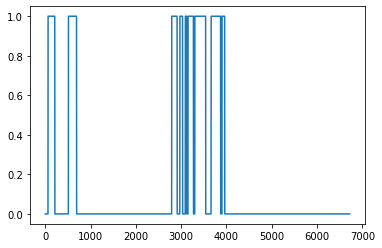

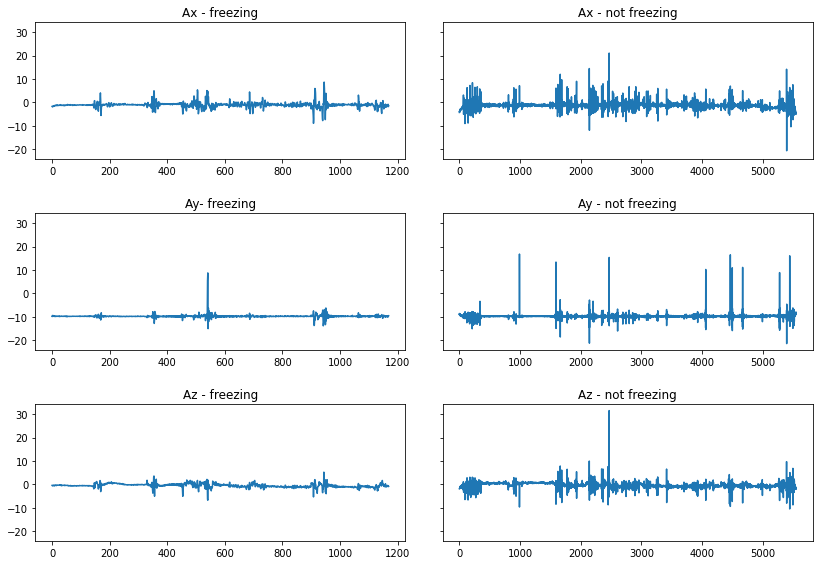

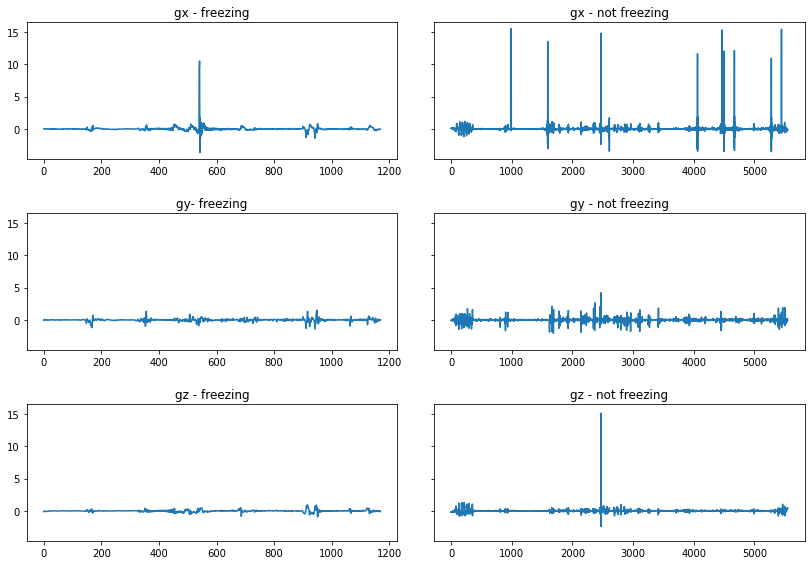

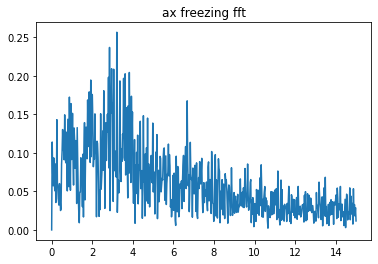

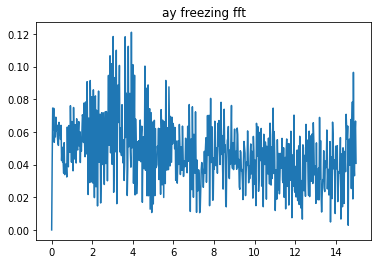

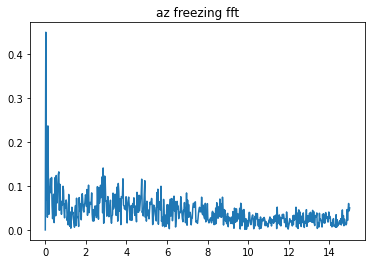

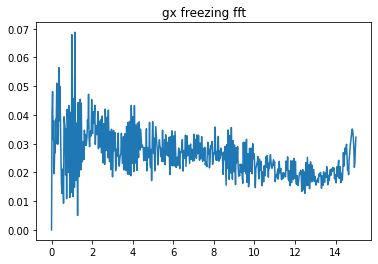

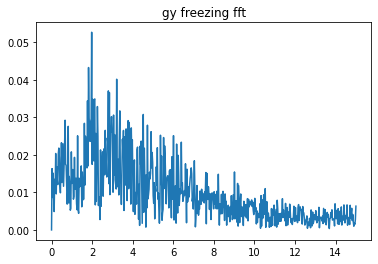

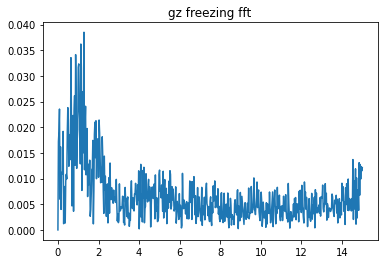

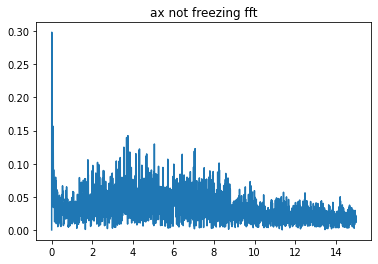

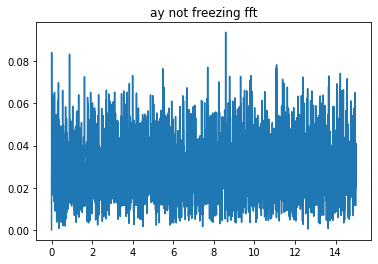

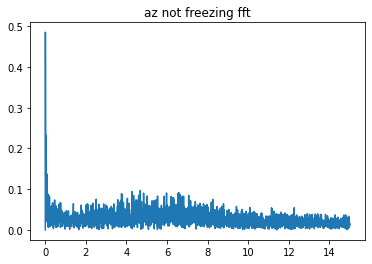

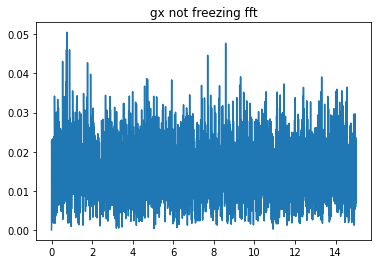

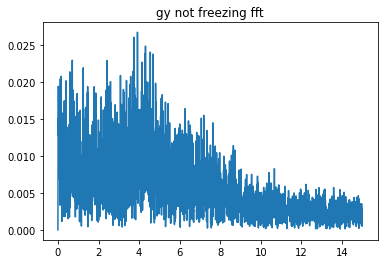

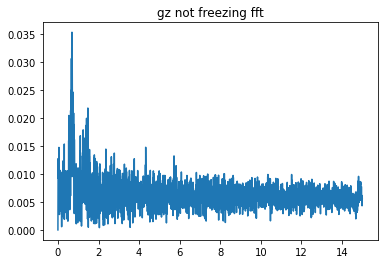

D:\LifeSpark Technology\labelled(RL2)\AK\r2_seg_1.csv


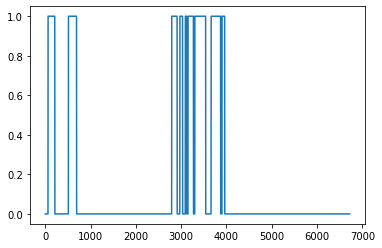

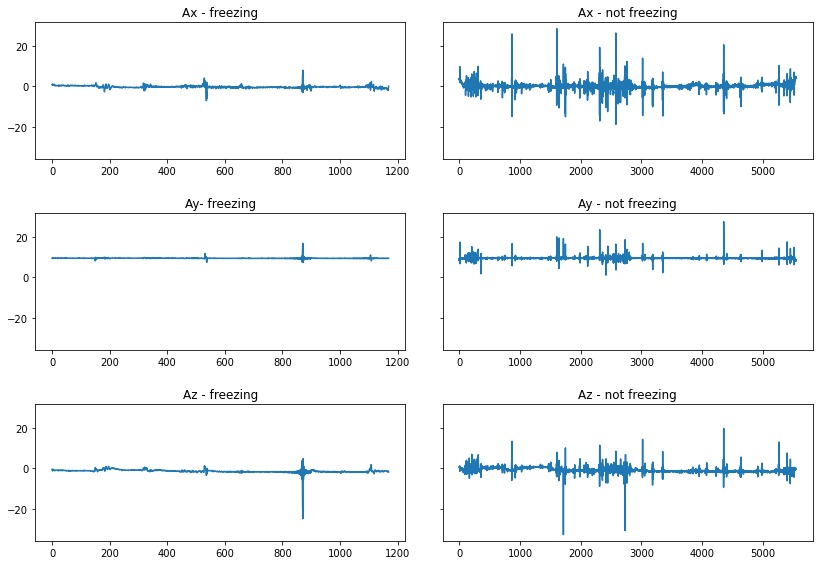

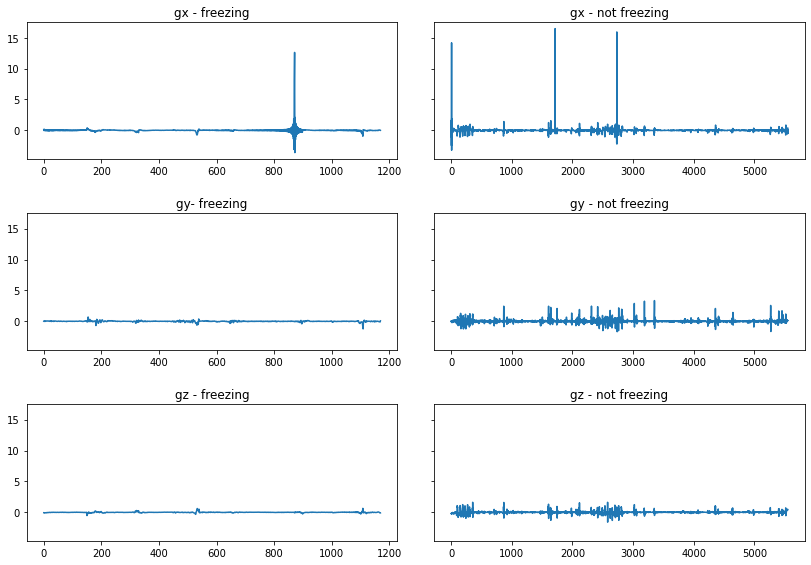

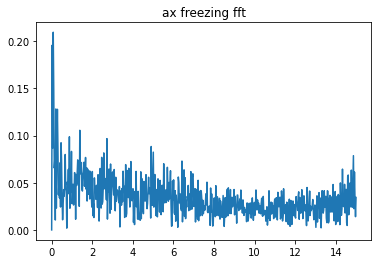

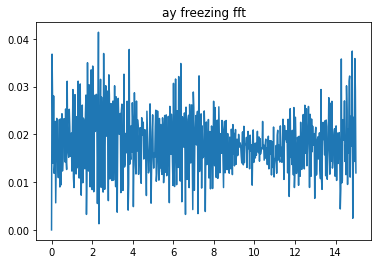

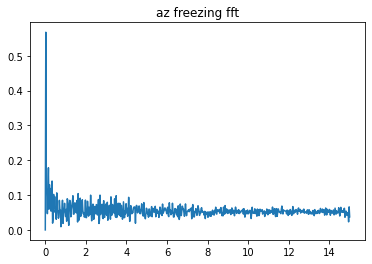

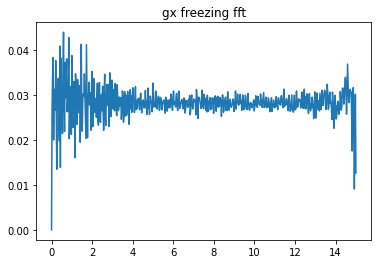

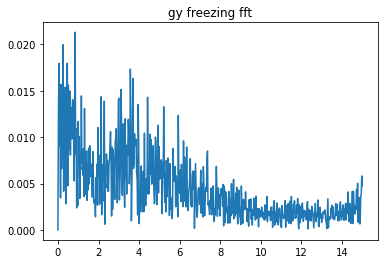

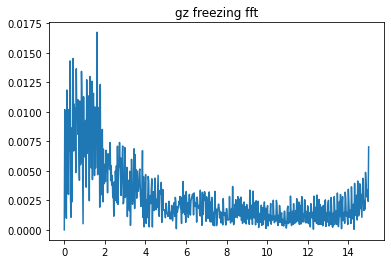

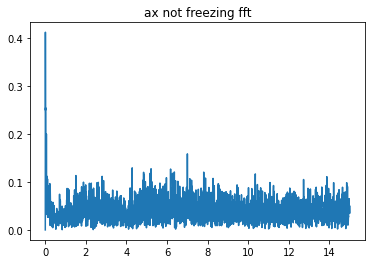

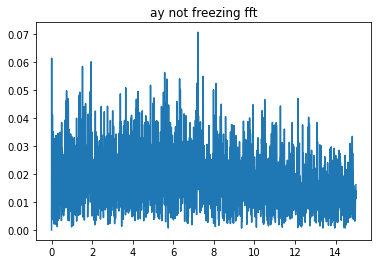

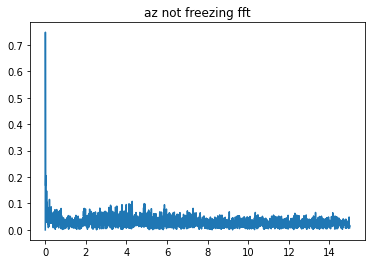

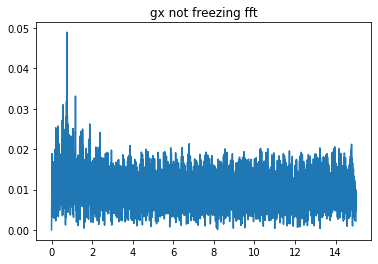

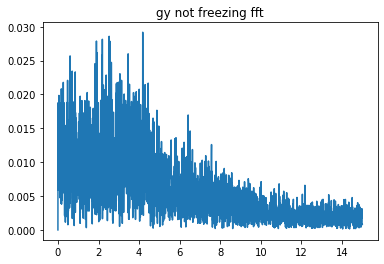

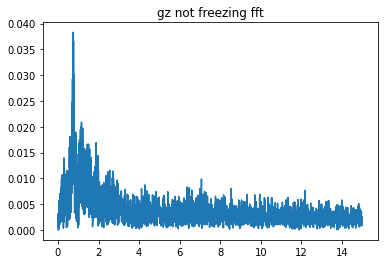

D:\LifeSpark Technology\labelled(RL2)\AKK\l2_seg.csv


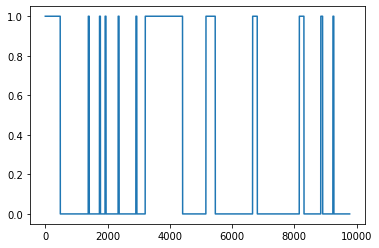

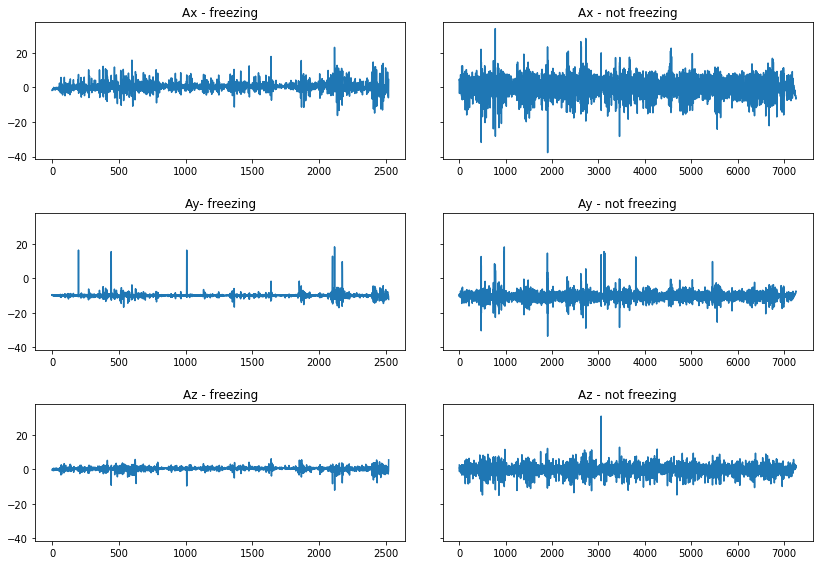

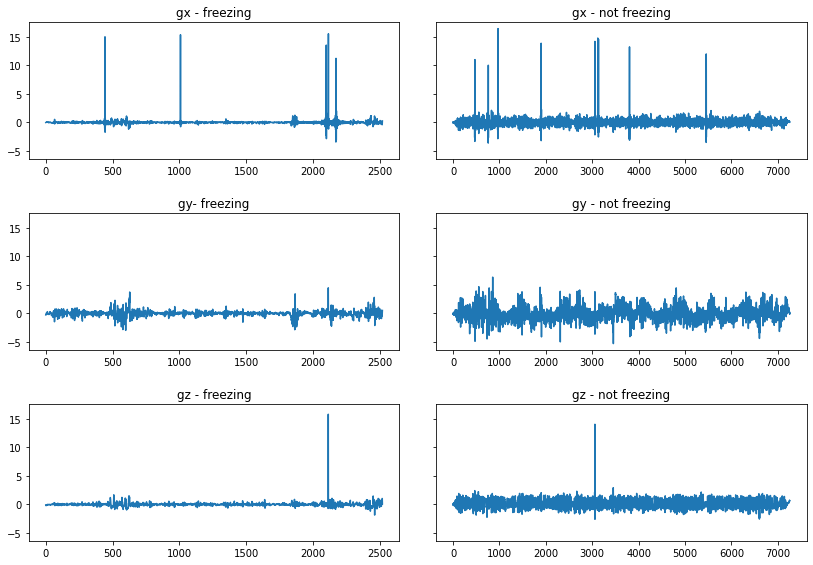

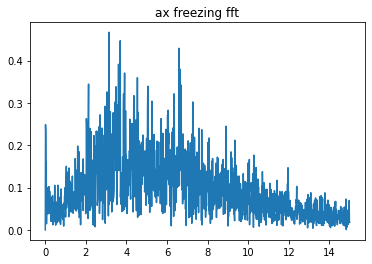

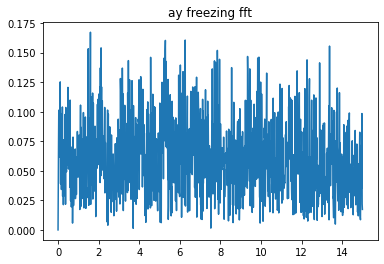

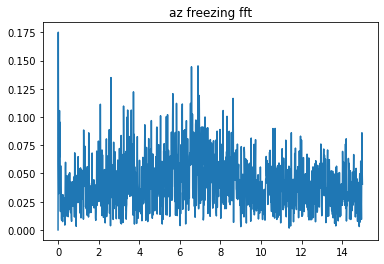

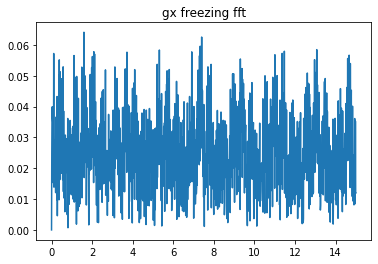

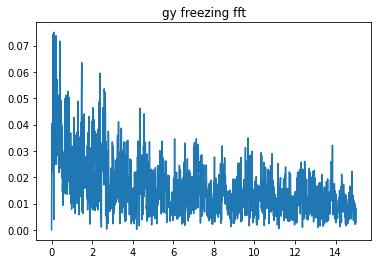

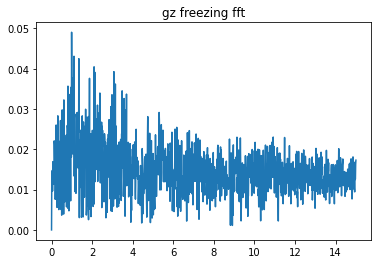

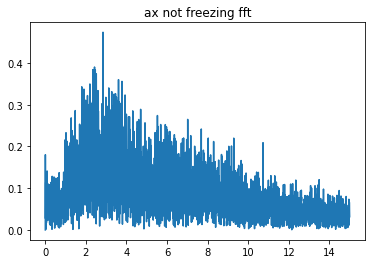

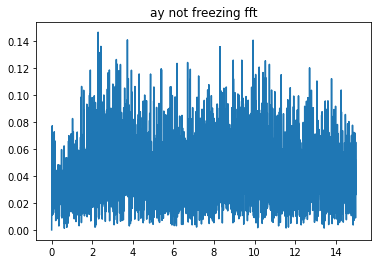

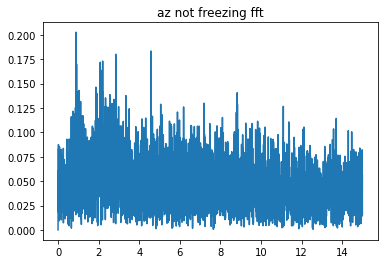

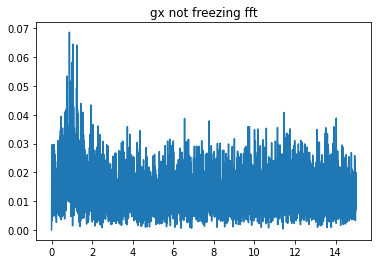

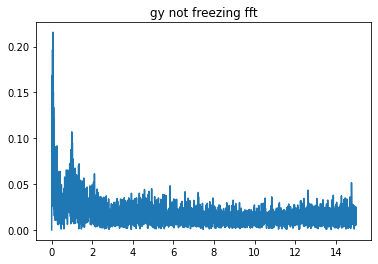

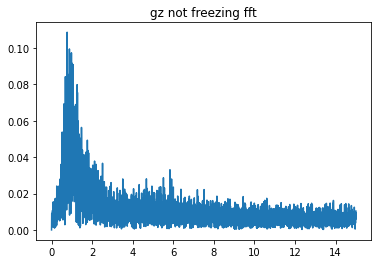

D:\LifeSpark Technology\labelled(RL2)\AKK\r2_seg.csv


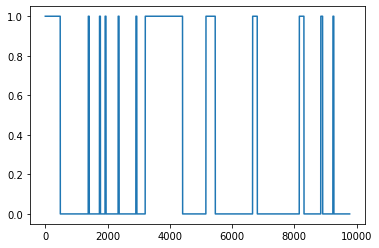

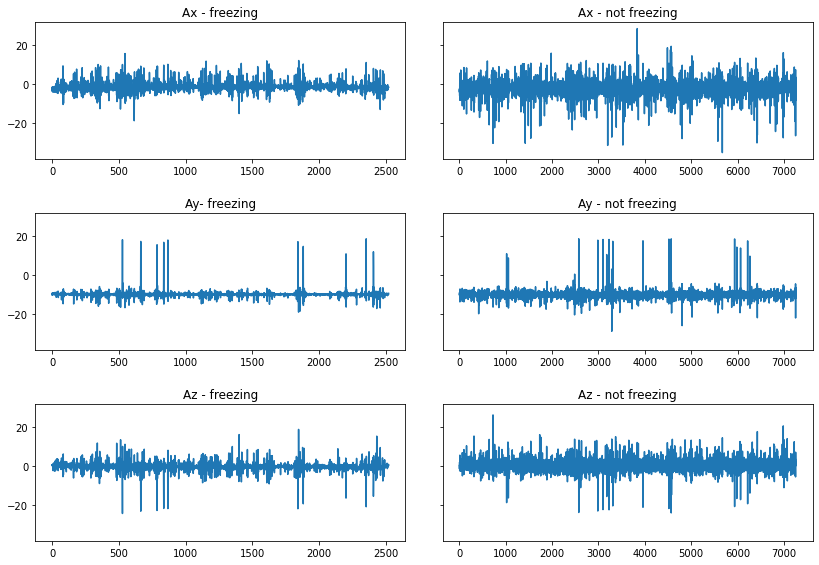

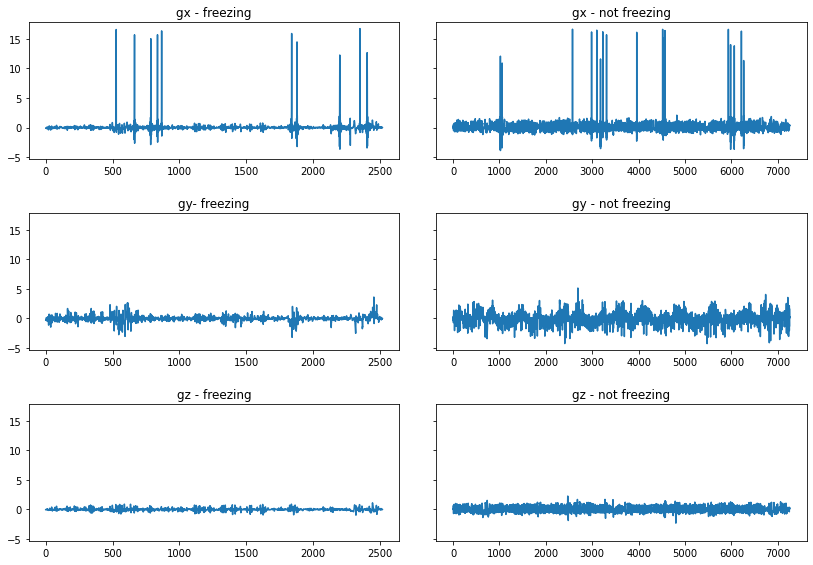

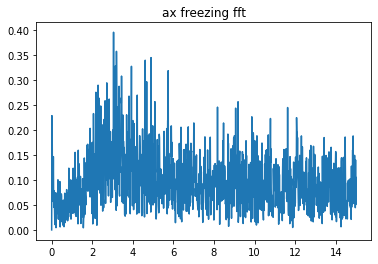

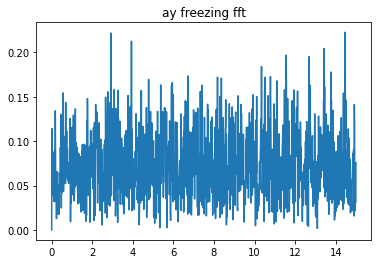

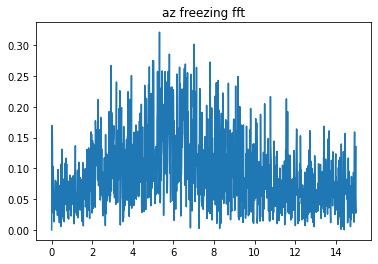

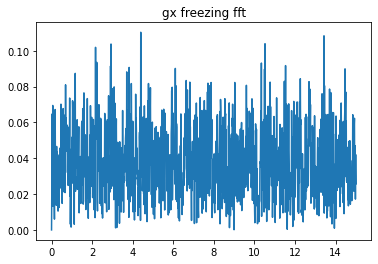

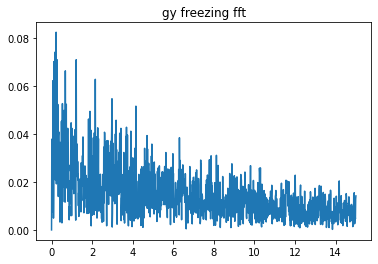

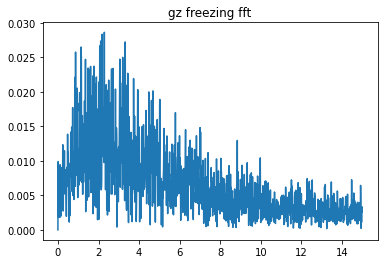

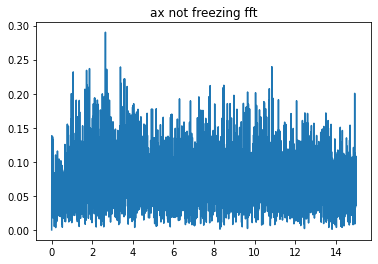

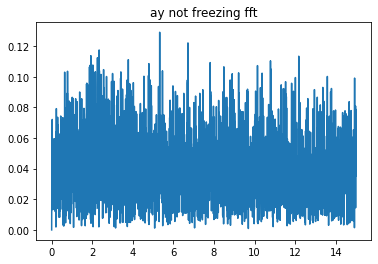

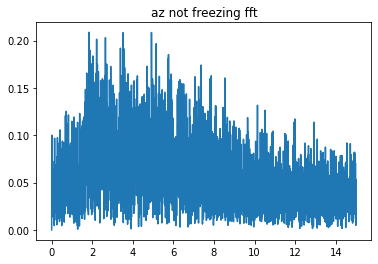

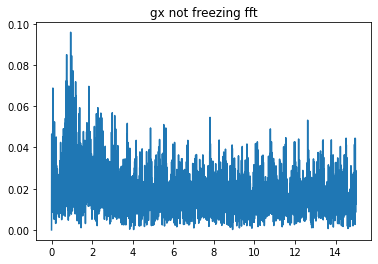

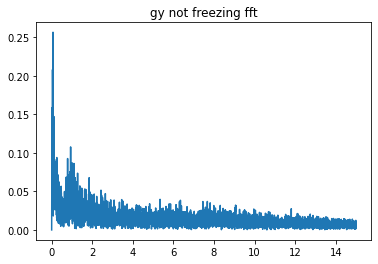

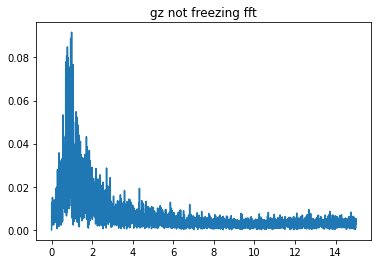

D:\LifeSpark Technology\labelled(RL2)\DP\l2_seg.csv


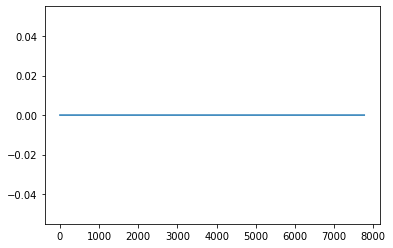

D:\LifeSpark Technology\labelled(RL2)\DP\r2_seg.csv


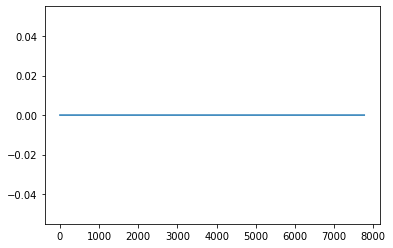

D:\LifeSpark Technology\labelled(RL2)\HRP\l2_seg.csv


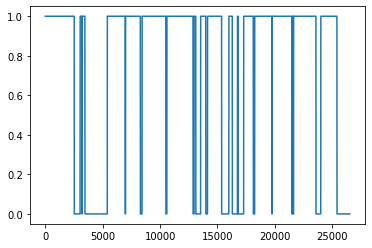

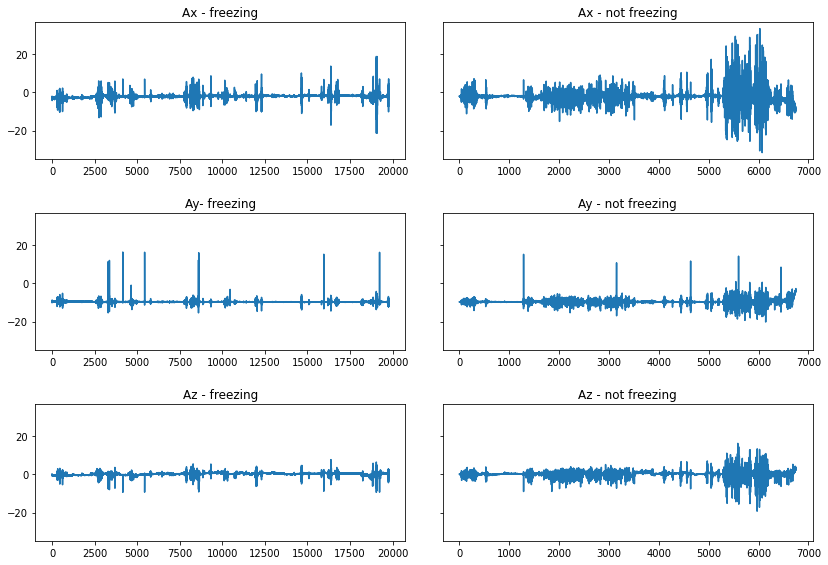

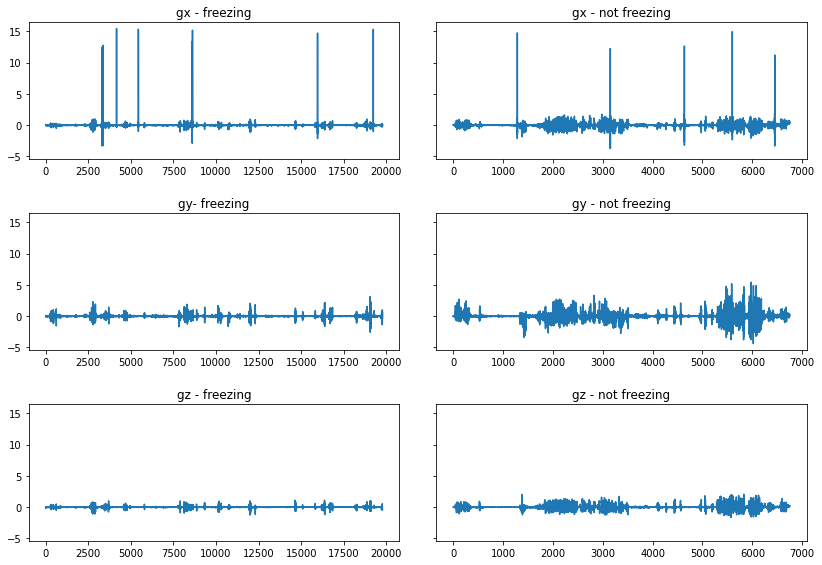

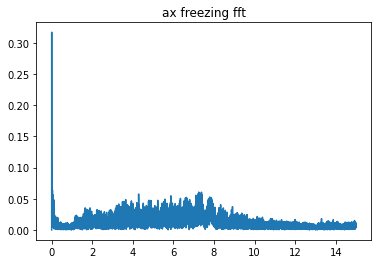

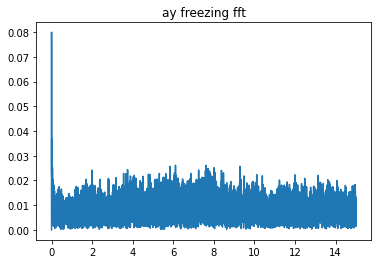

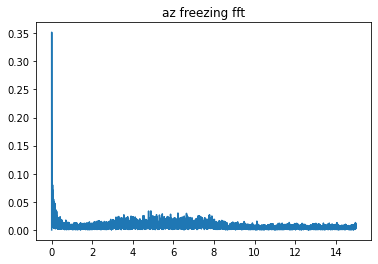

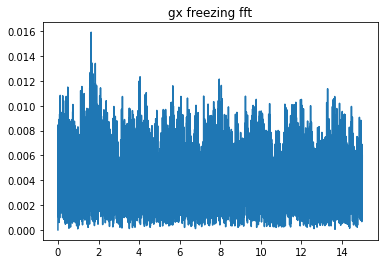

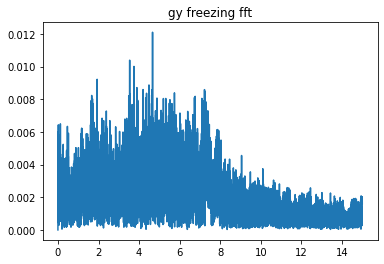

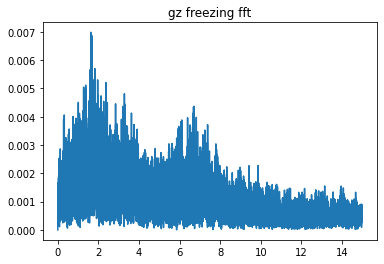

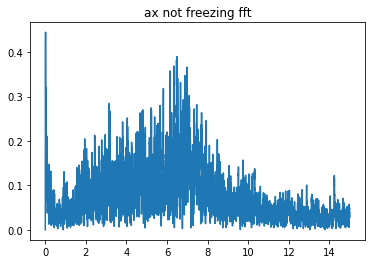

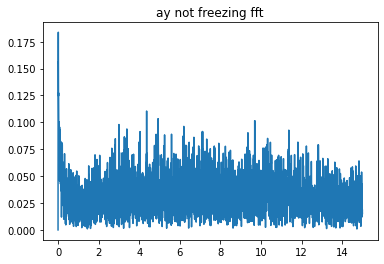

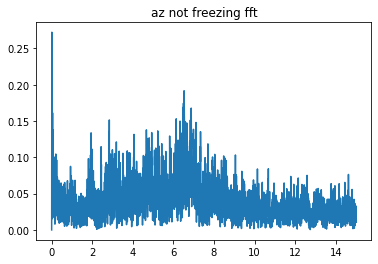

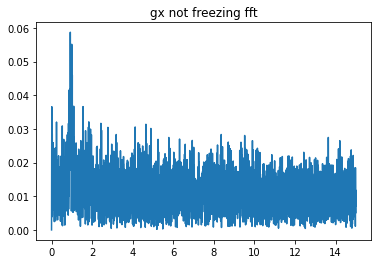

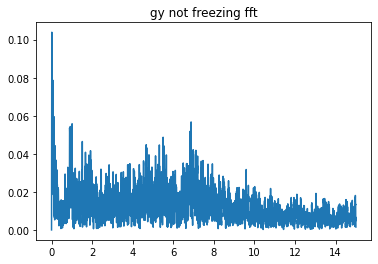

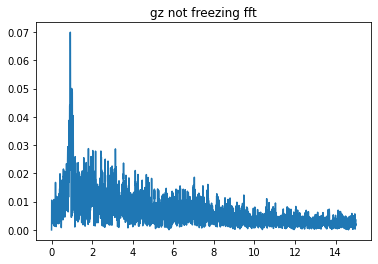

D:\LifeSpark Technology\labelled(RL2)\HRP\r2_seg.csv


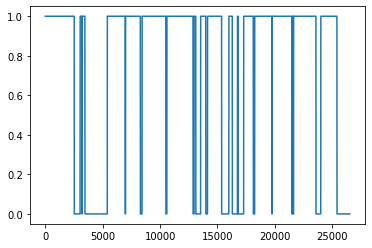

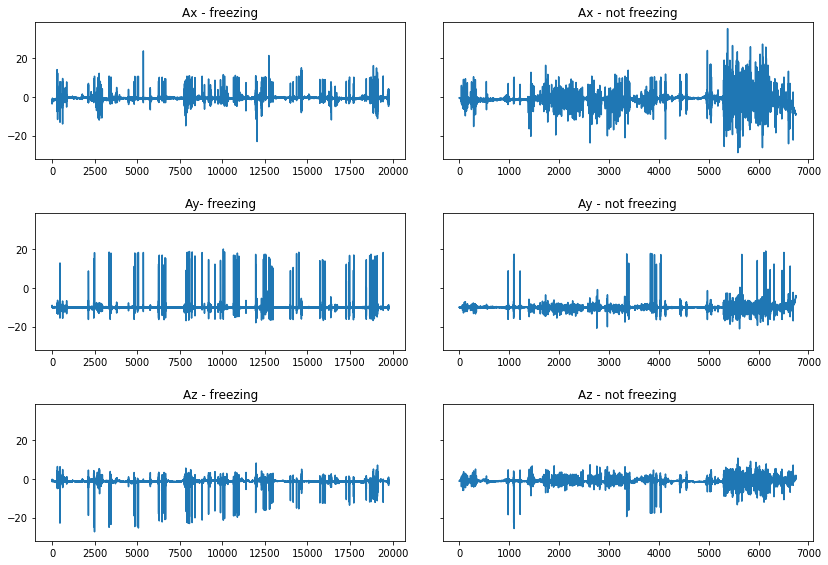

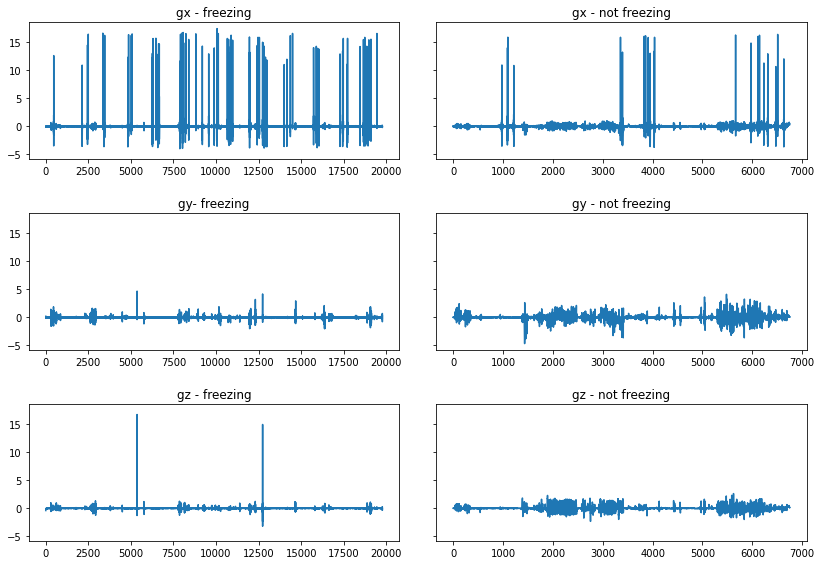

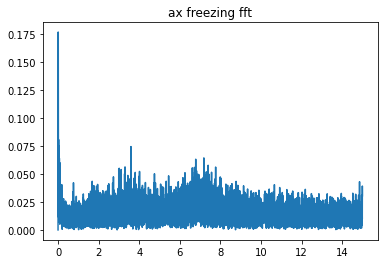

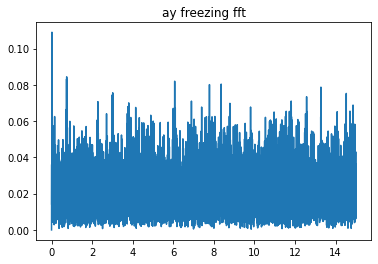

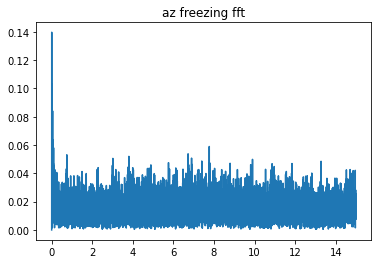

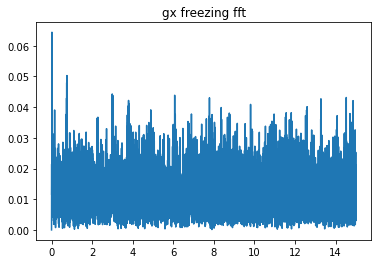

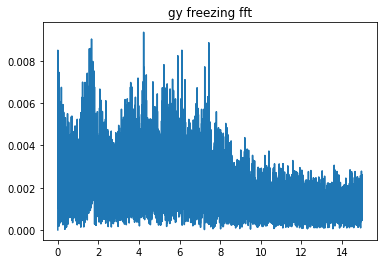

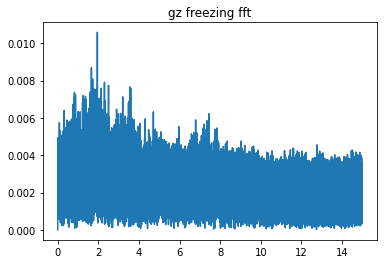

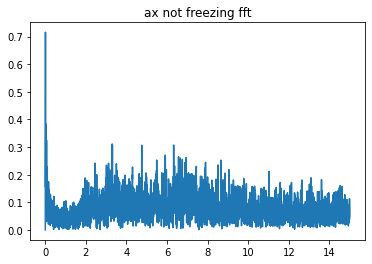

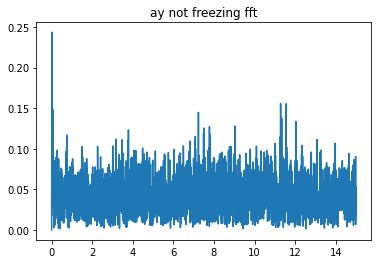

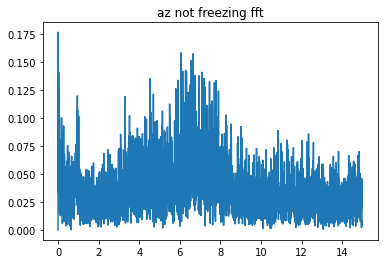

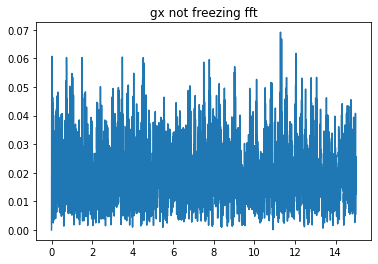

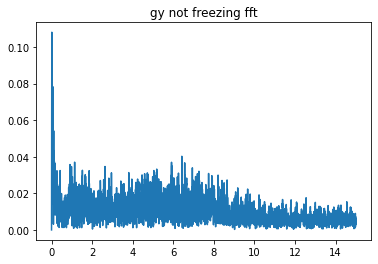

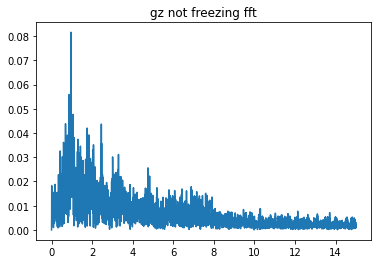

D:\LifeSpark Technology\labelled(RL2)\KS\l2_seg.csv


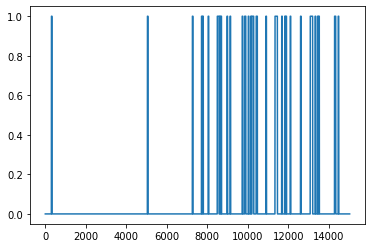

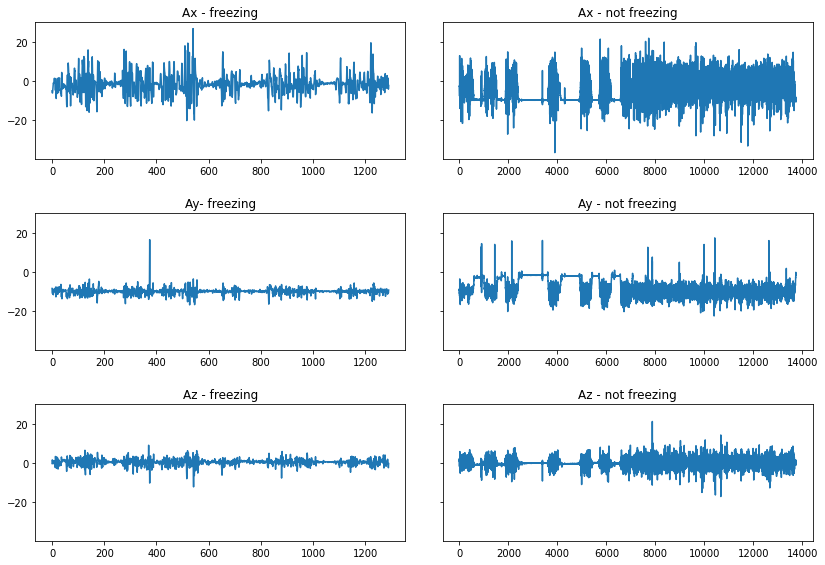

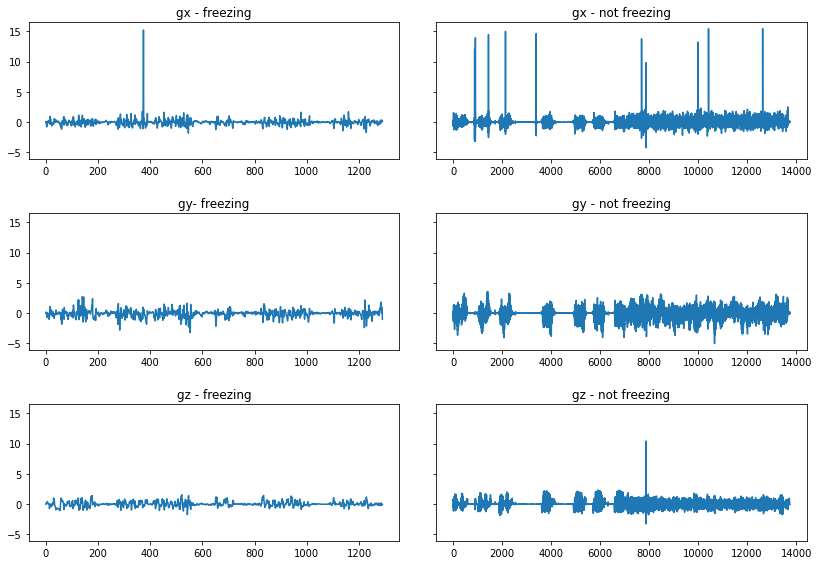

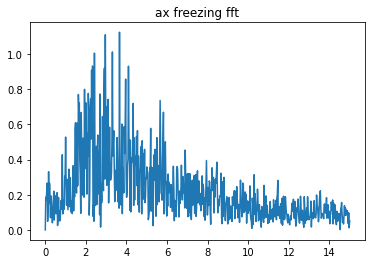

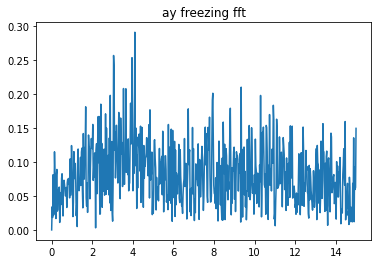

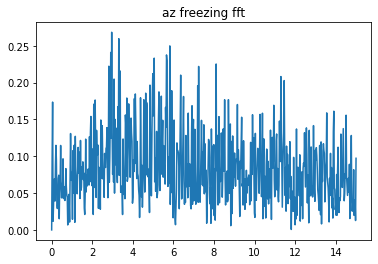

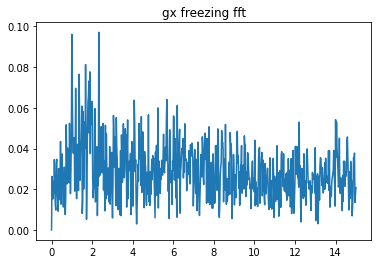

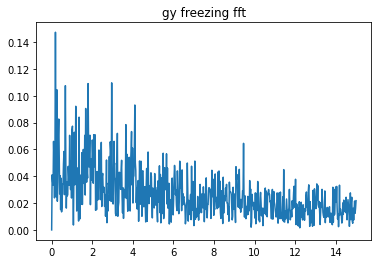

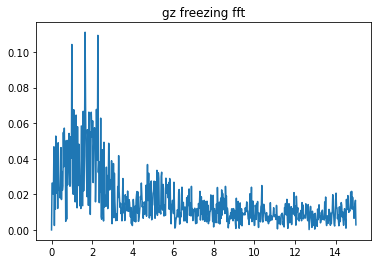

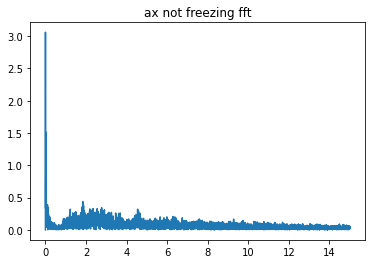

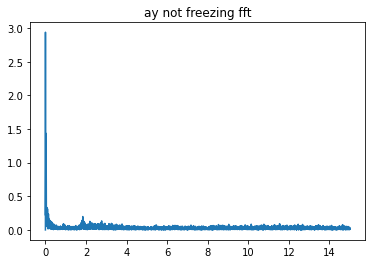

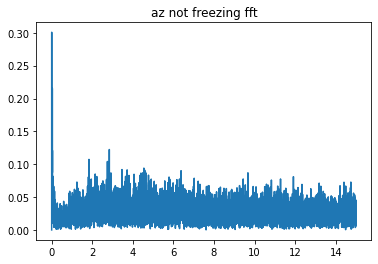

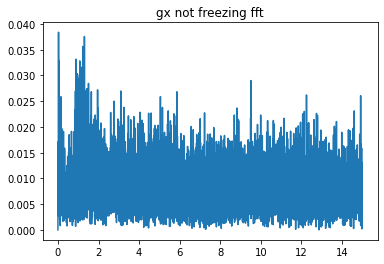

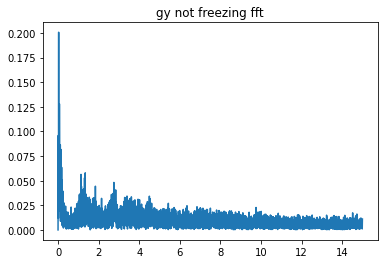

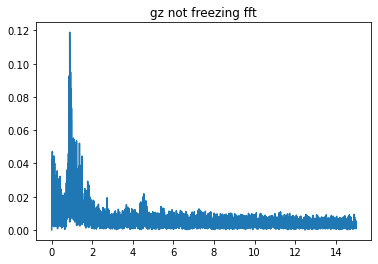

D:\LifeSpark Technology\labelled(RL2)\KS\r2_seg.csv


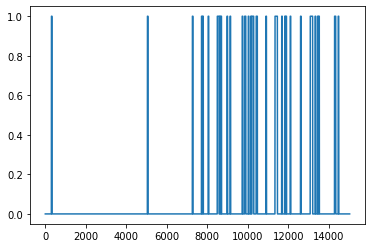

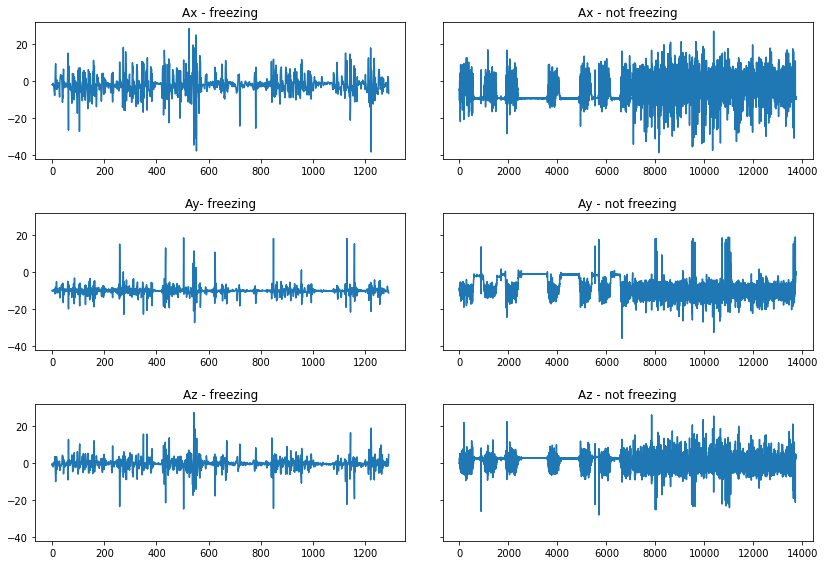

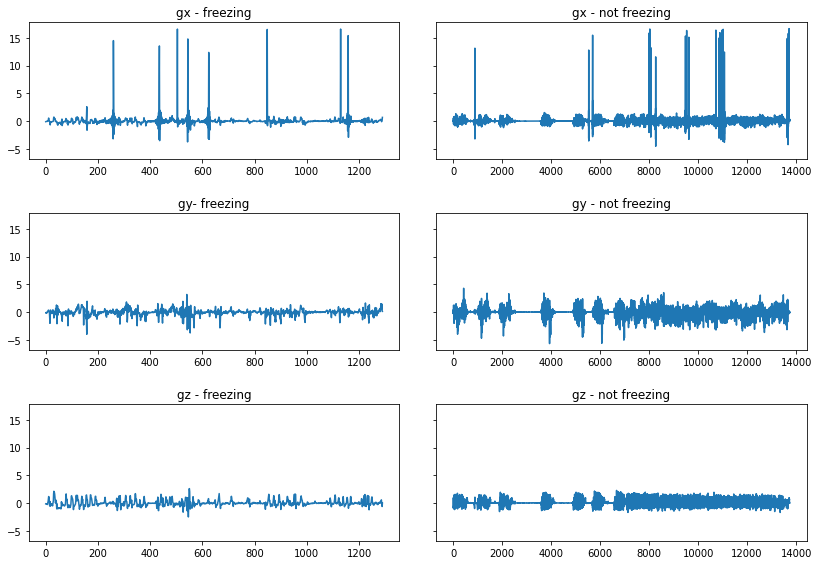

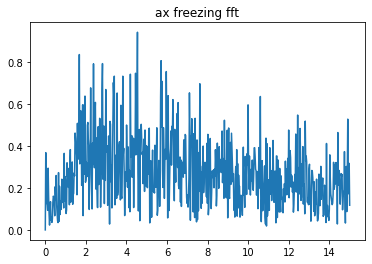

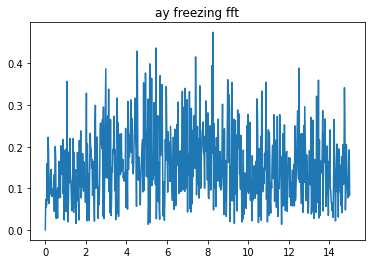

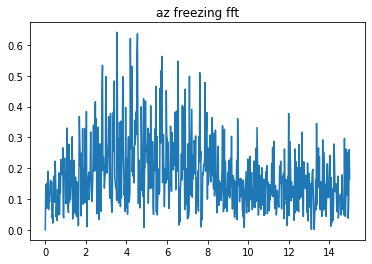

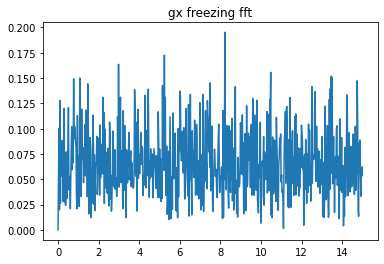

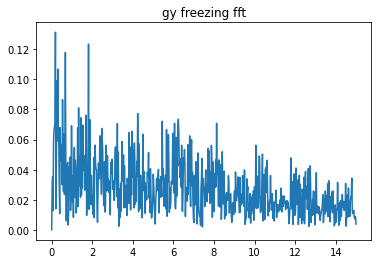

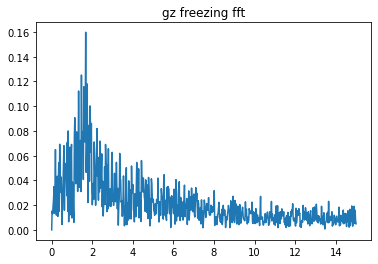

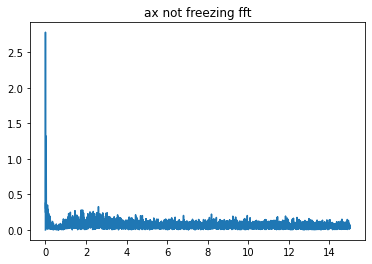

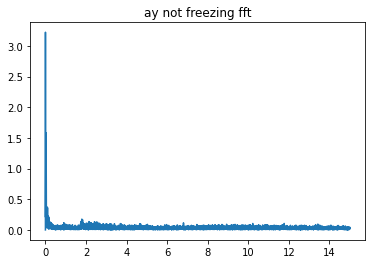

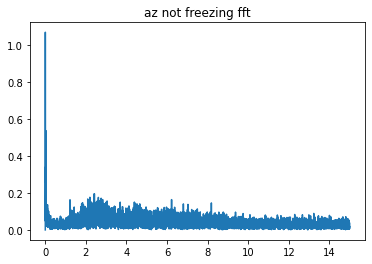

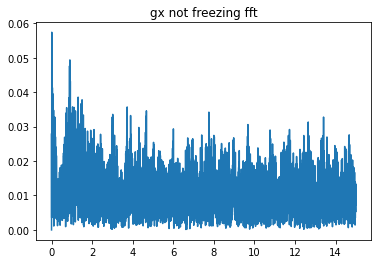

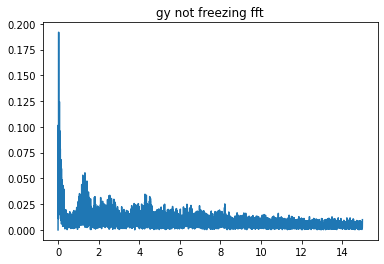

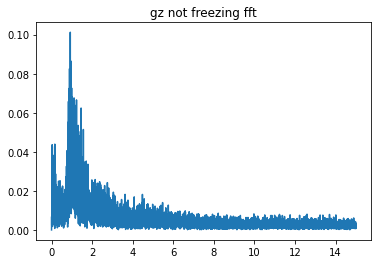

D:\LifeSpark Technology\labelled(RL2)\MT\l2_seg.csv


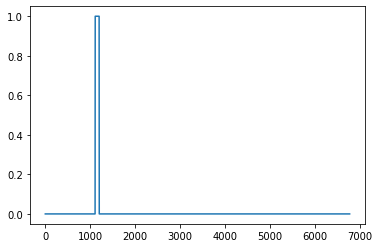

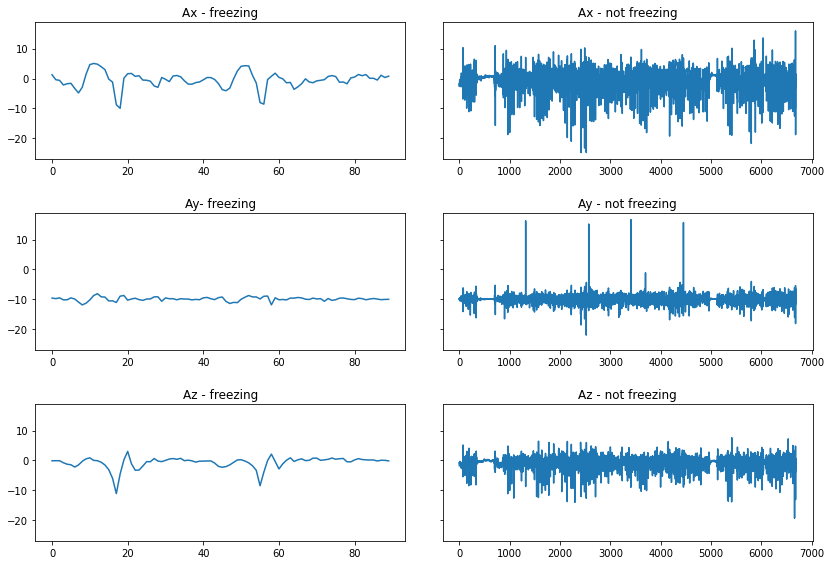

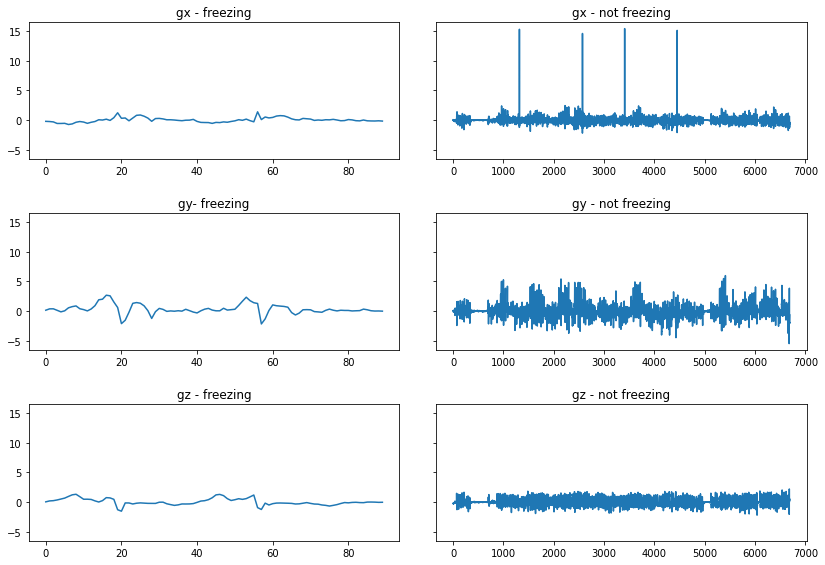

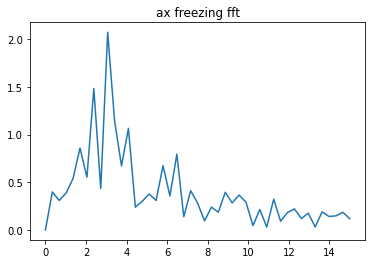

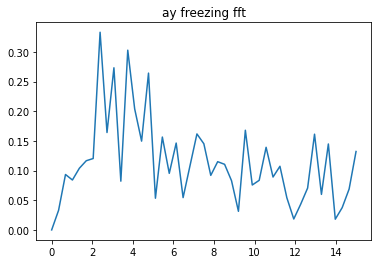

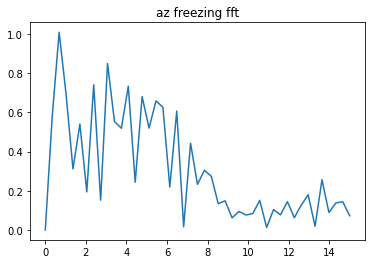

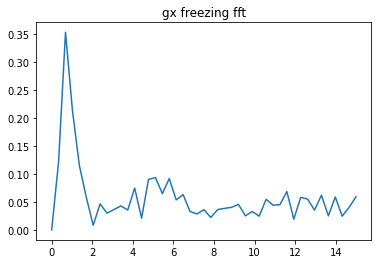

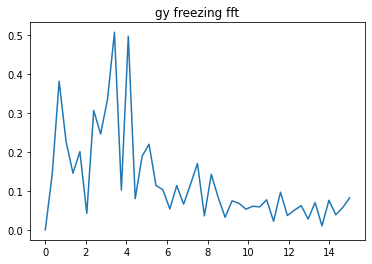

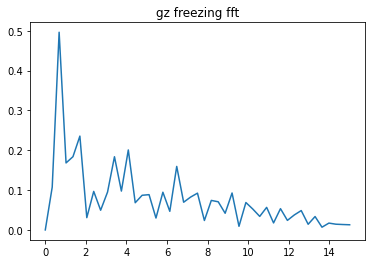

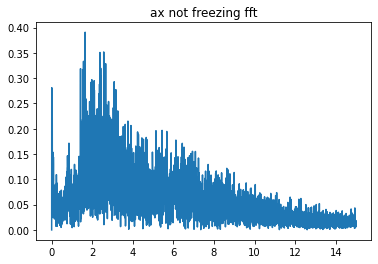

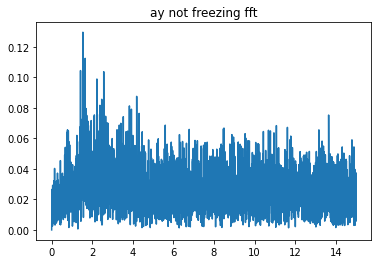

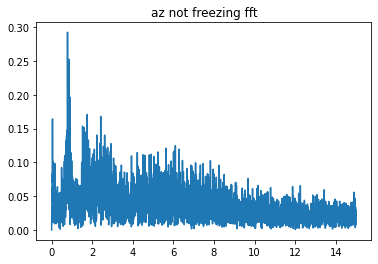

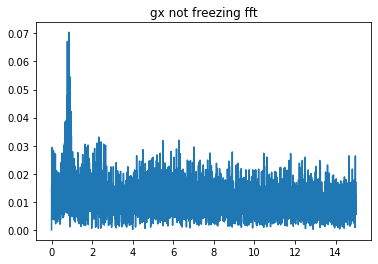

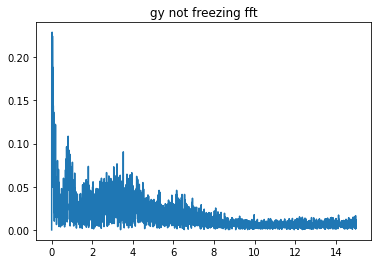

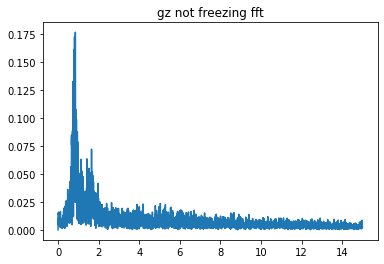

D:\LifeSpark Technology\labelled(RL2)\MT\r2_seg.csv


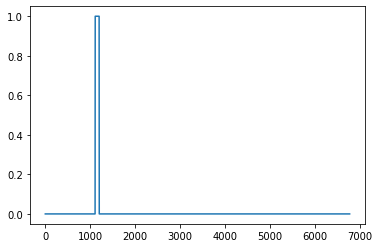

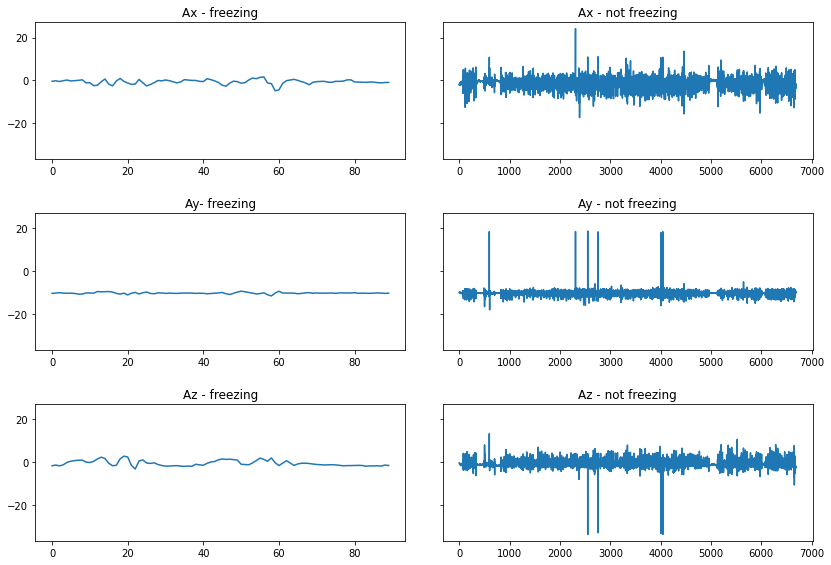

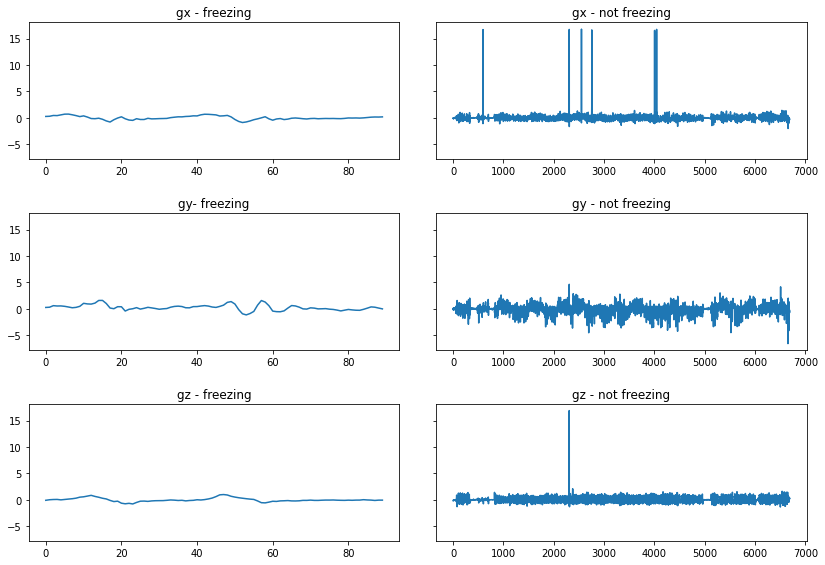

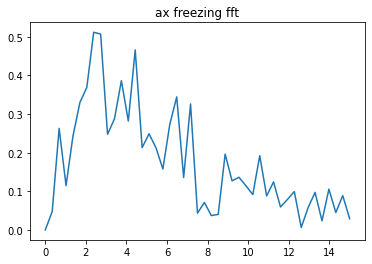

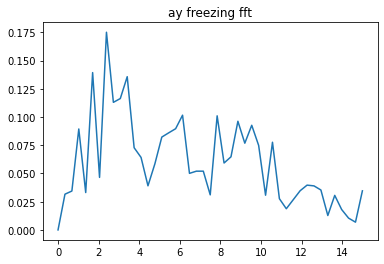

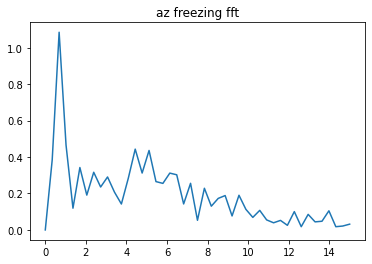

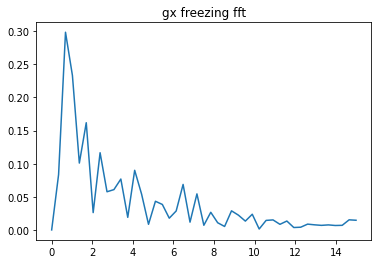

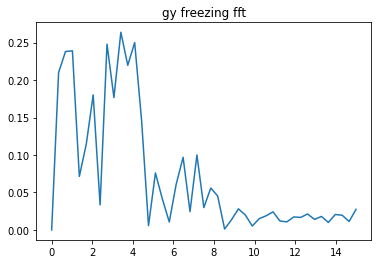

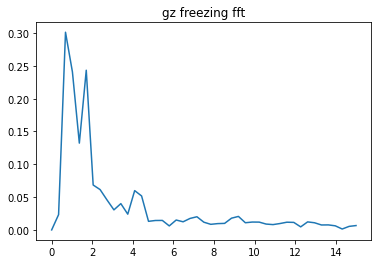

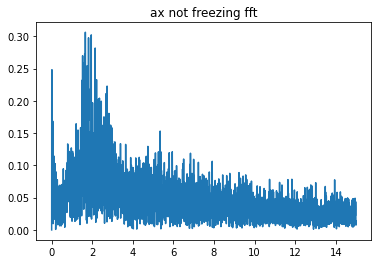

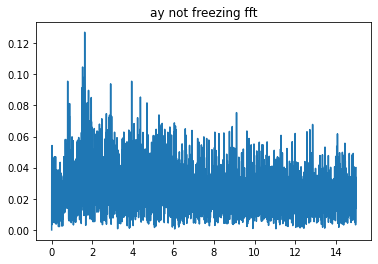

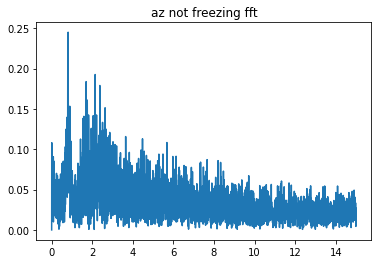

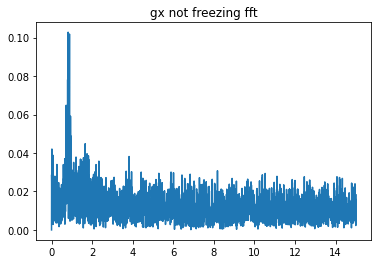

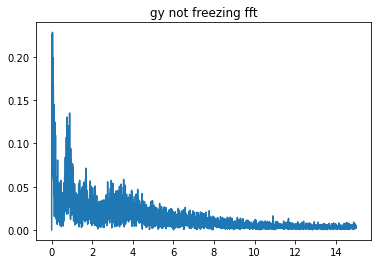

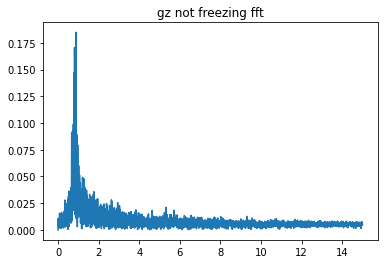

D:\LifeSpark Technology\labelled(RL2)\PJ\l2_seg_1.csv


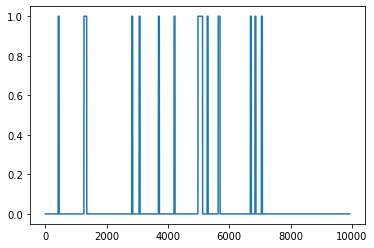

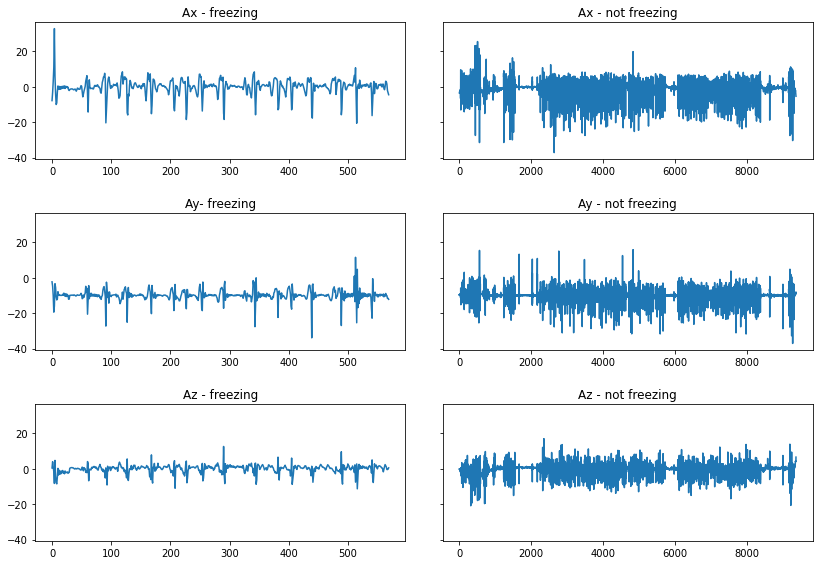

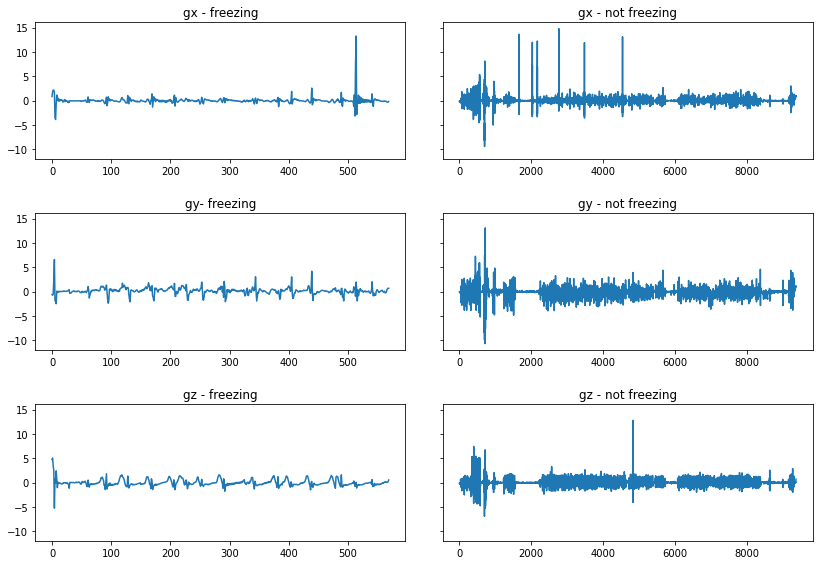

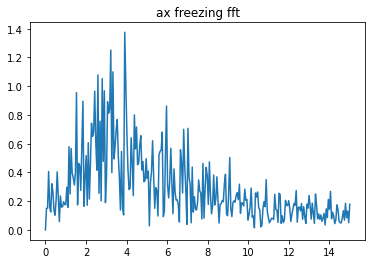

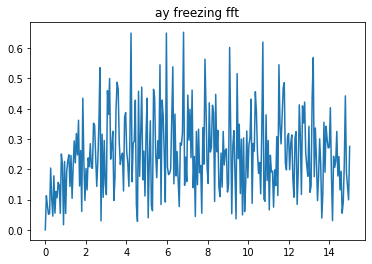

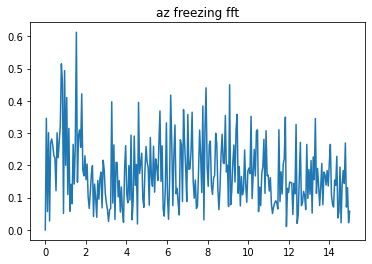

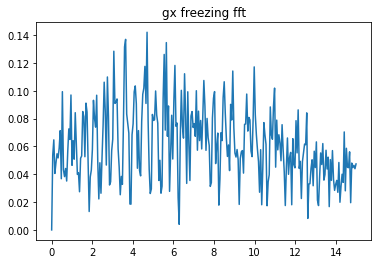

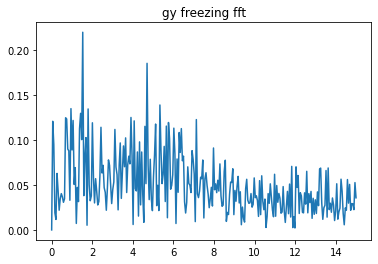

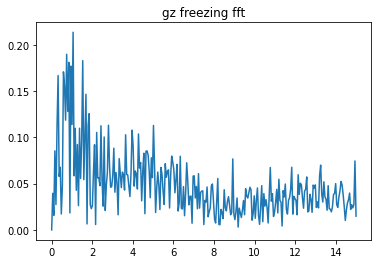

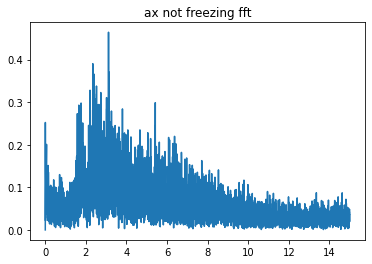

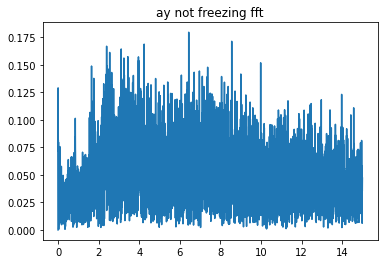

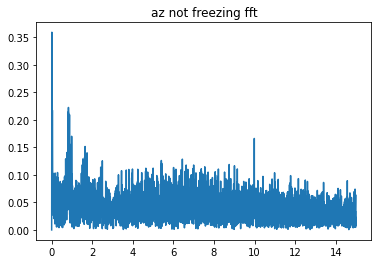

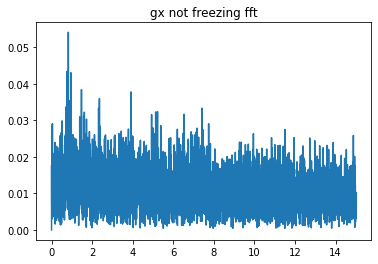

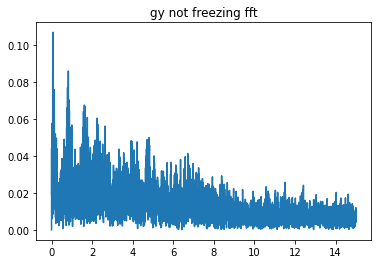

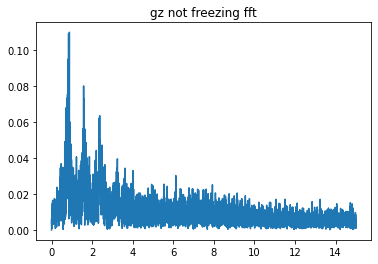

D:\LifeSpark Technology\labelled(RL2)\PJ\l2_seg_2.csv


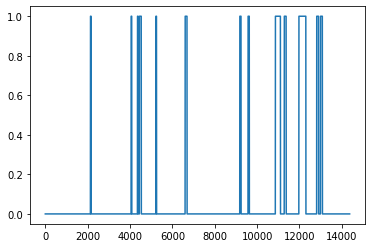

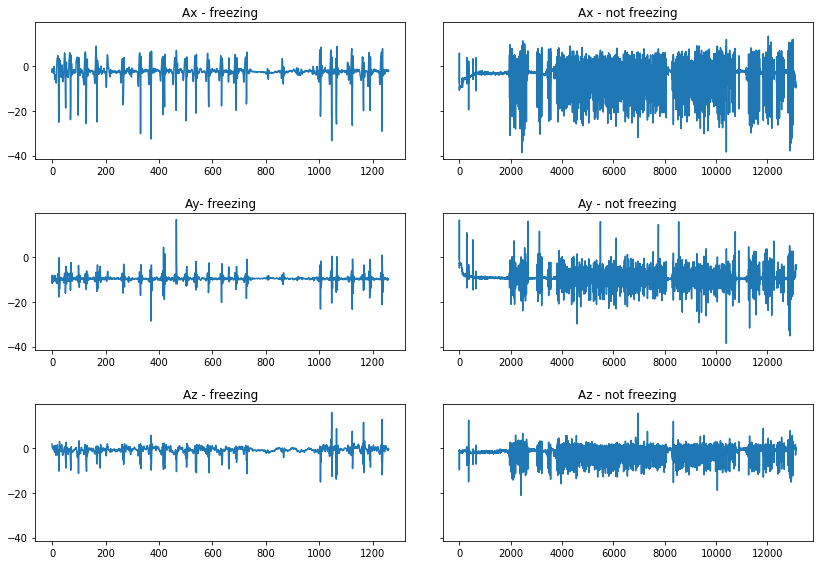

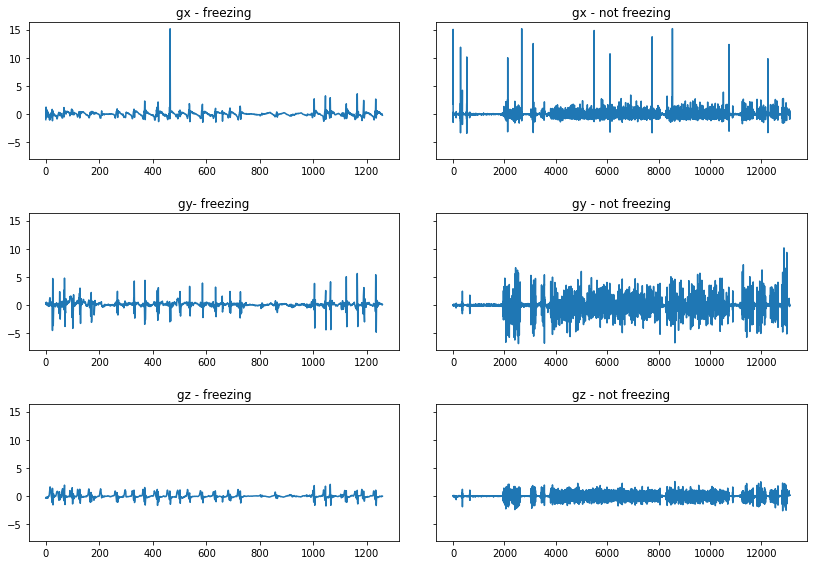

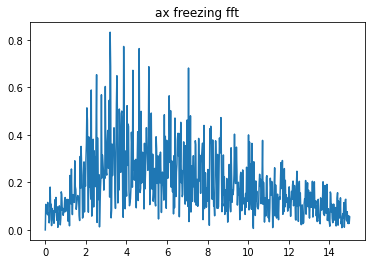

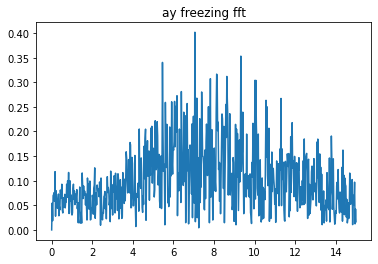

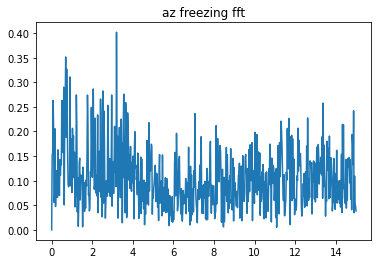

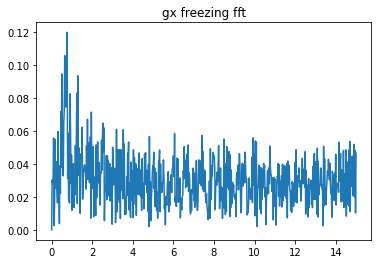

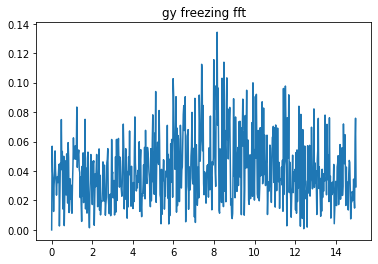

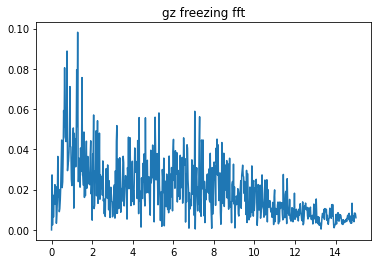

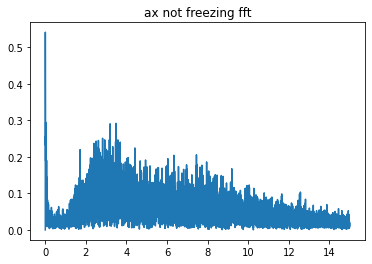

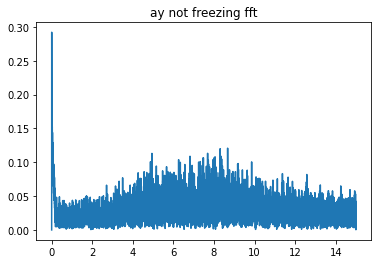

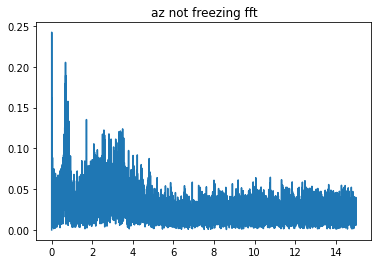

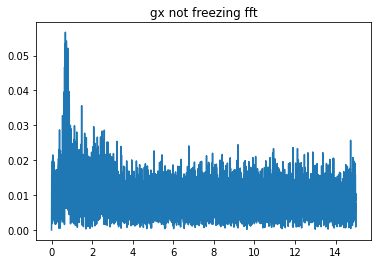

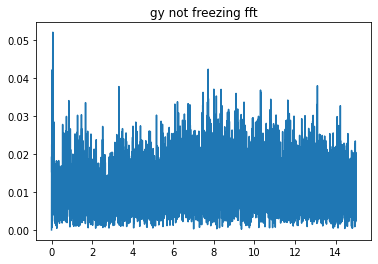

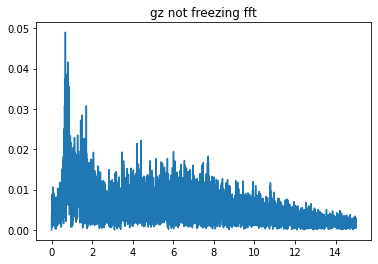

D:\LifeSpark Technology\labelled(RL2)\PJ\r2_seg_1.csv


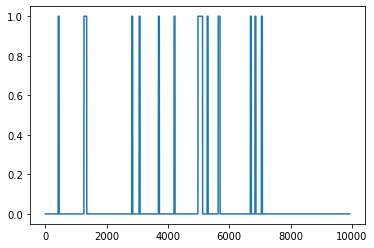

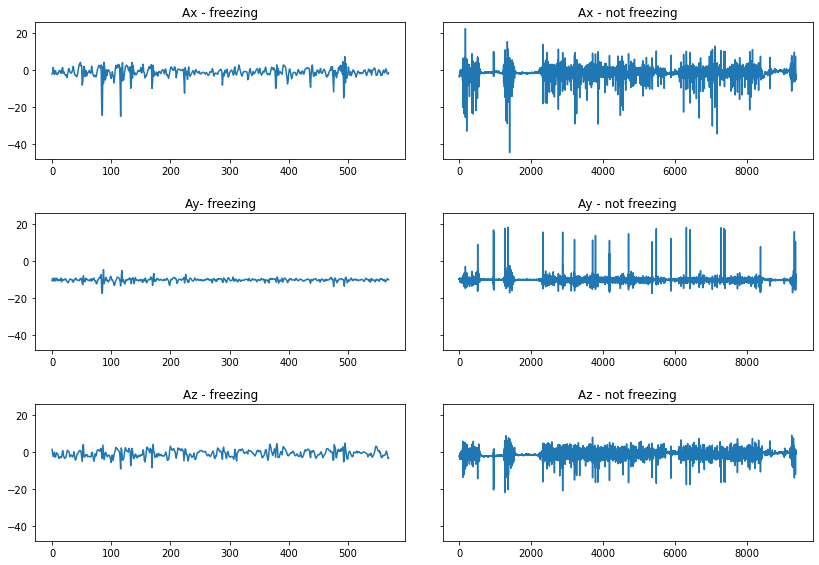

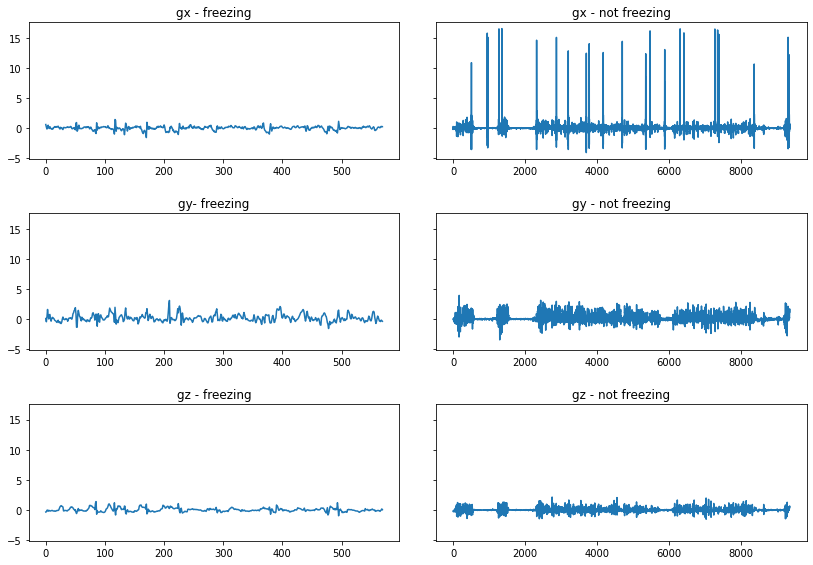

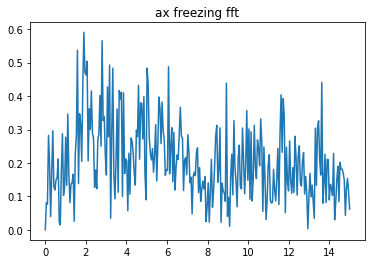

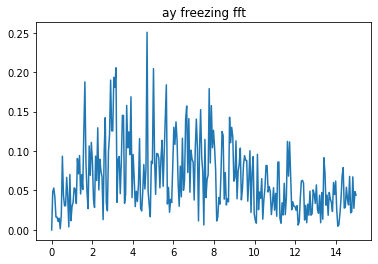

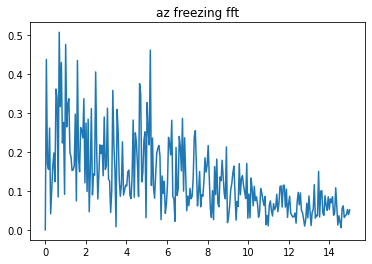

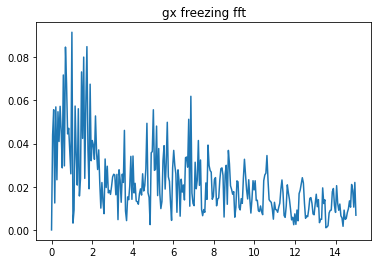

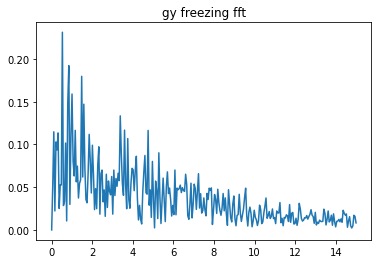

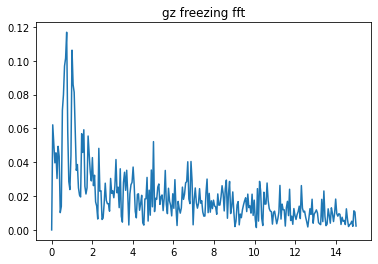

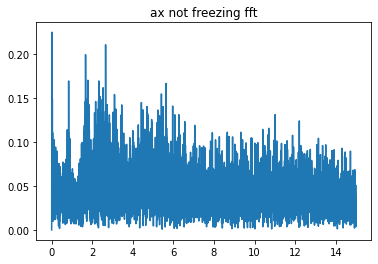

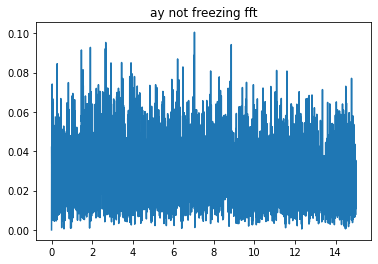

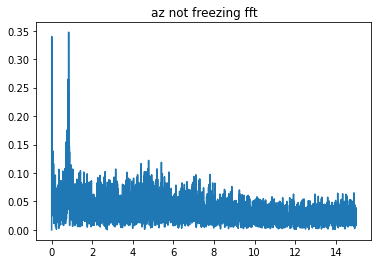

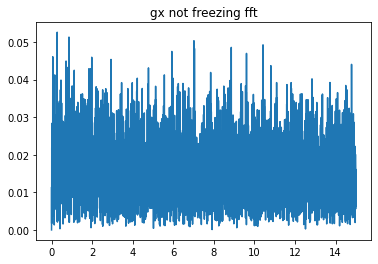

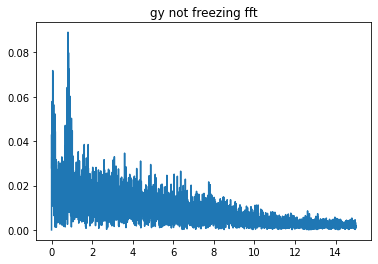

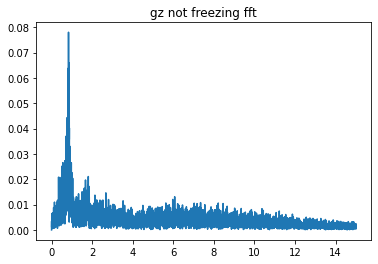

D:\LifeSpark Technology\labelled(RL2)\PJ\r2_seg_2.csv


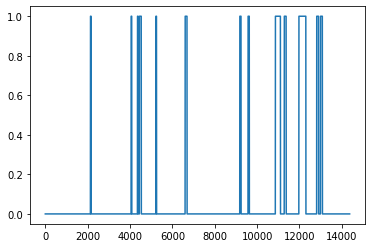

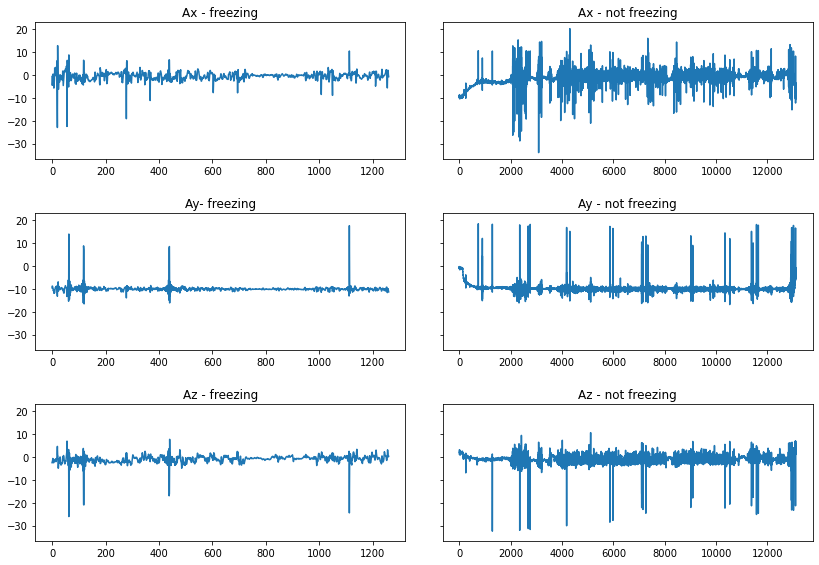

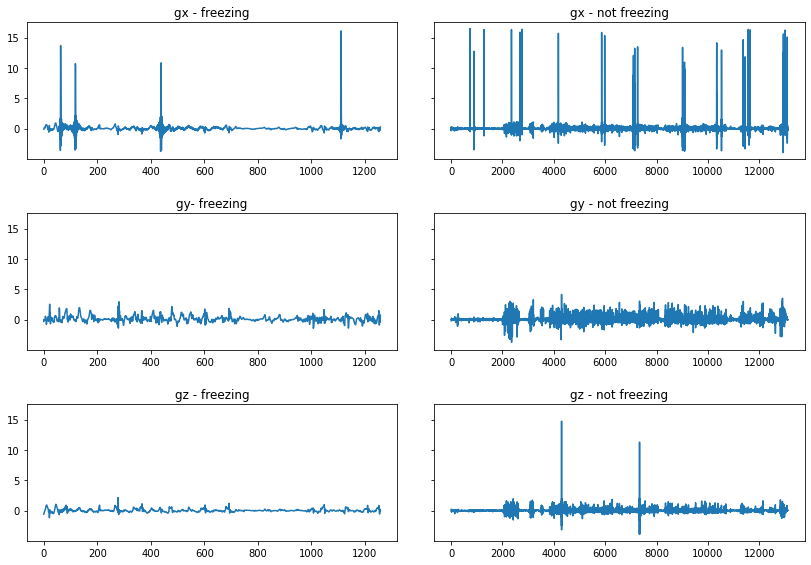

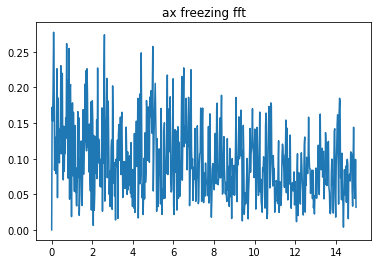

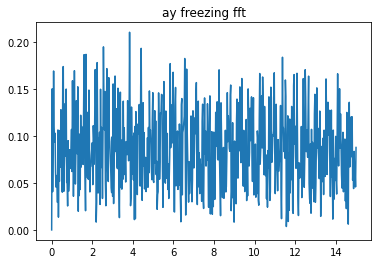

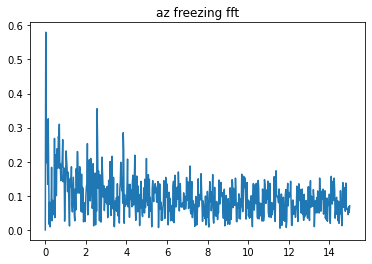

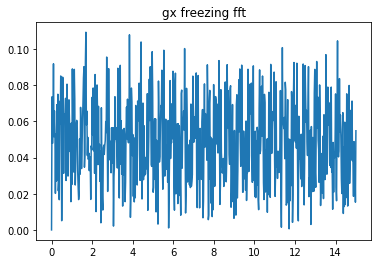

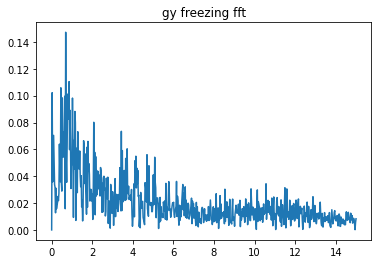

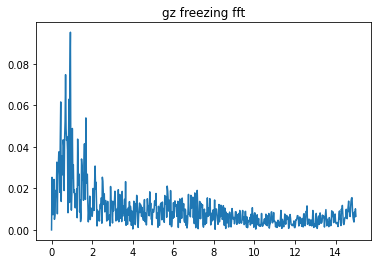

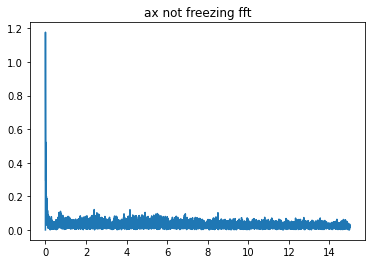

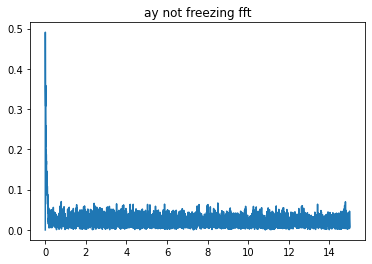

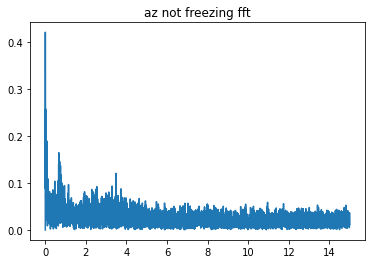

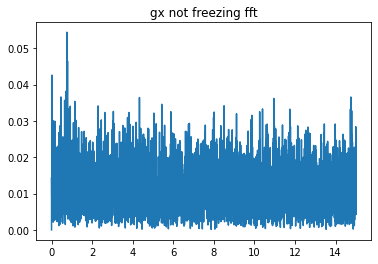

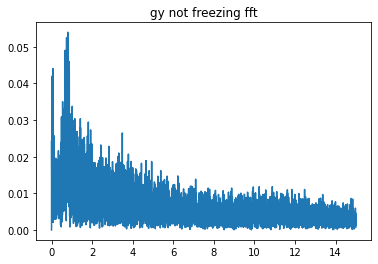

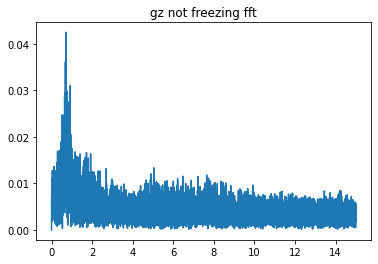

D:\LifeSpark Technology\labelled(RL2)\RB\l2_seg.csv


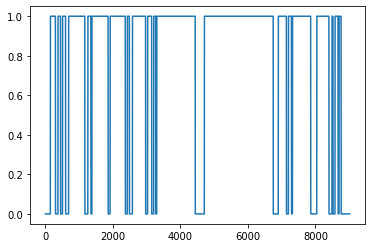

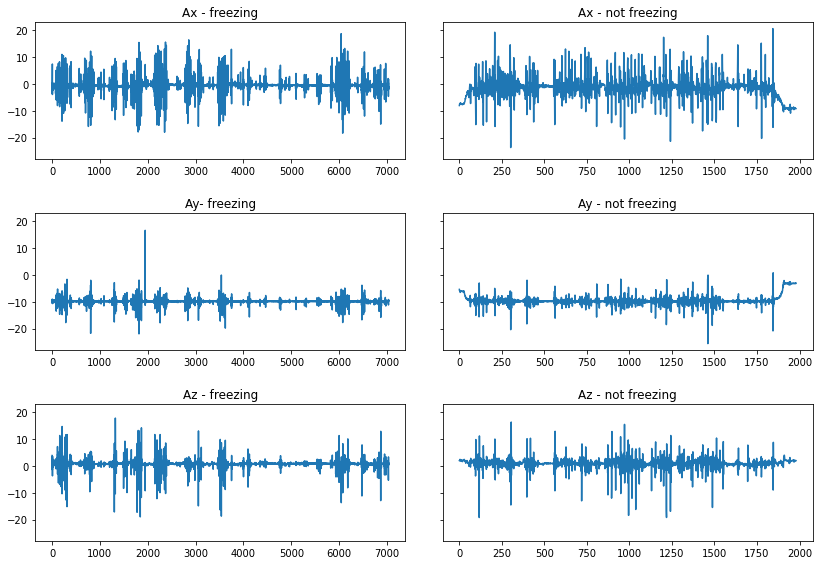

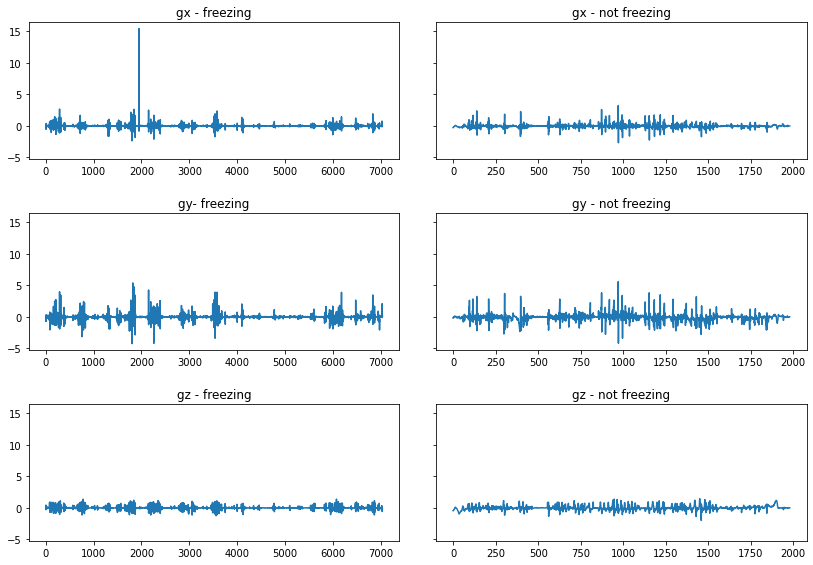

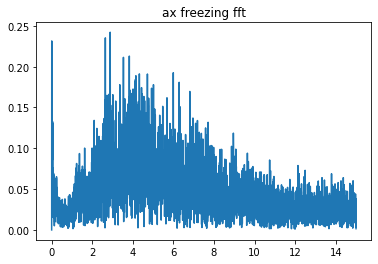

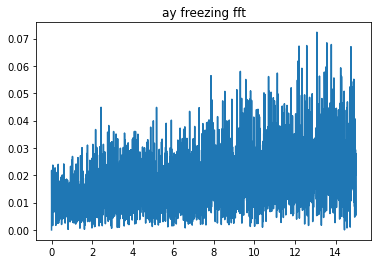

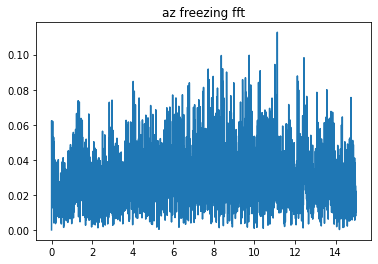

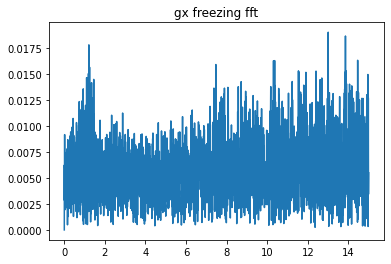

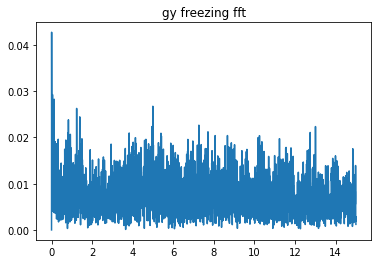

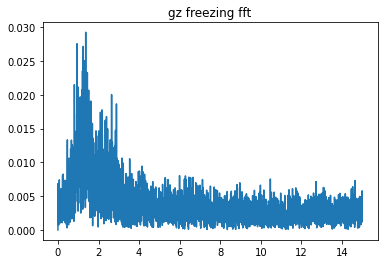

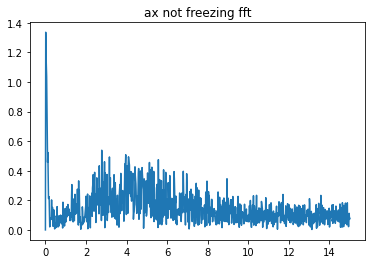

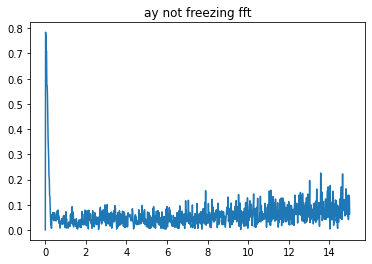

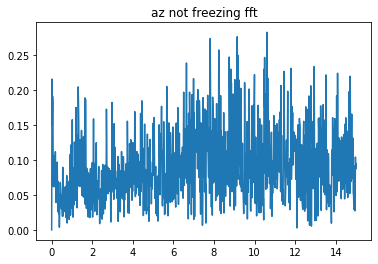

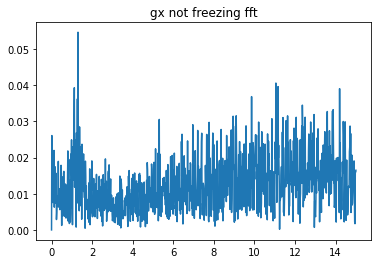

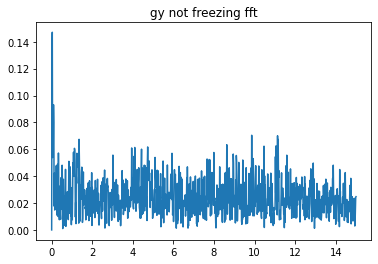

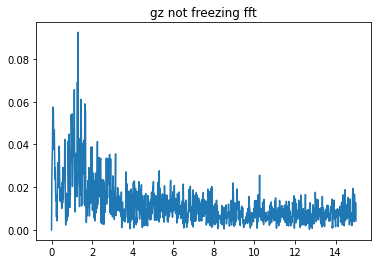

D:\LifeSpark Technology\labelled(RL2)\RB\r2_seg.csv


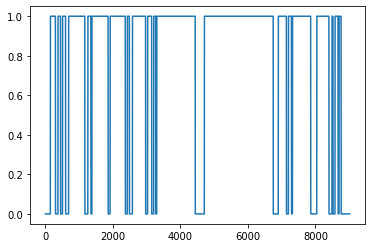

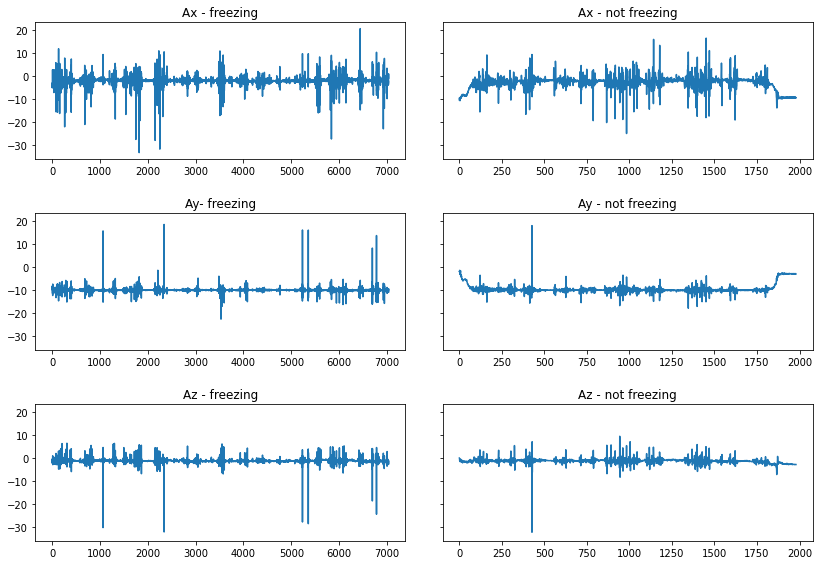

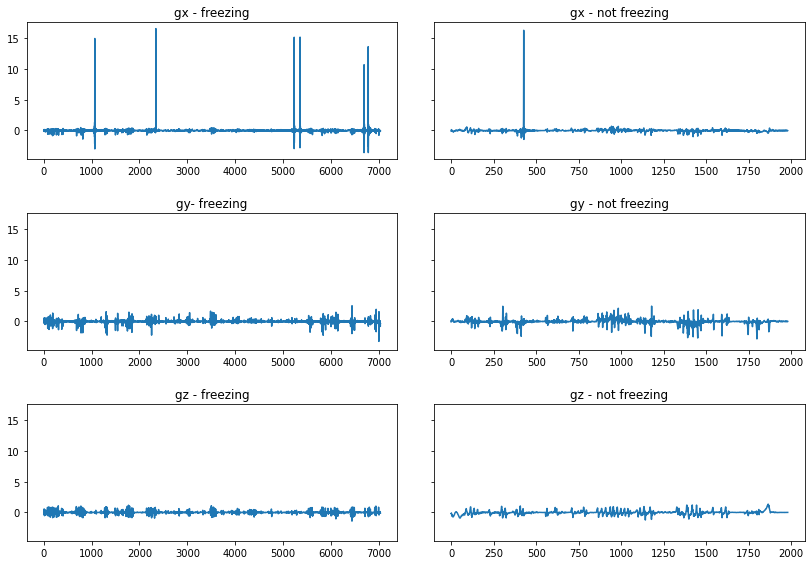

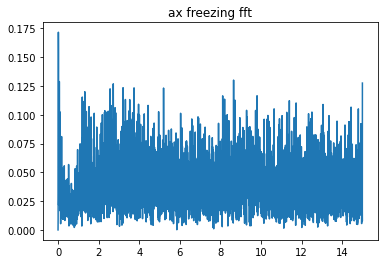

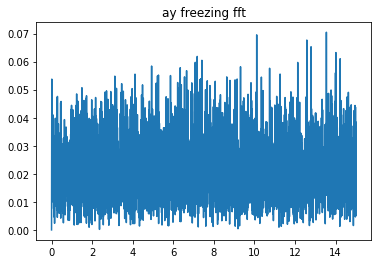

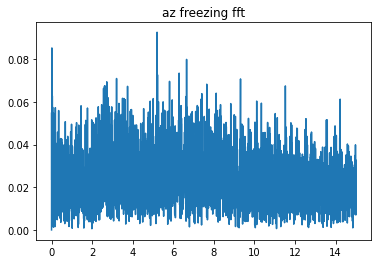

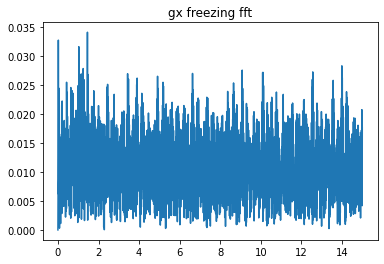

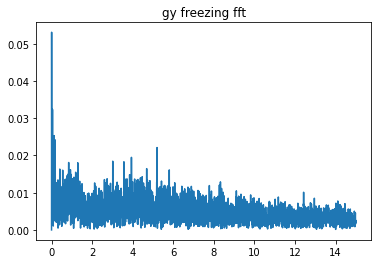

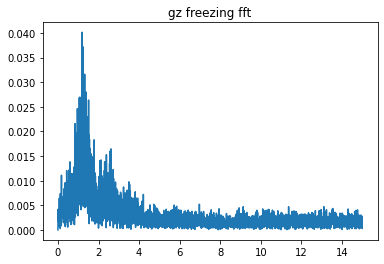

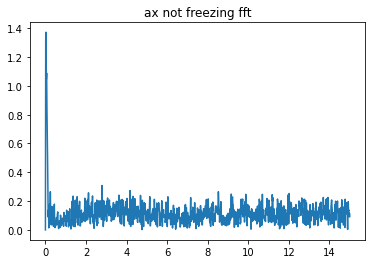

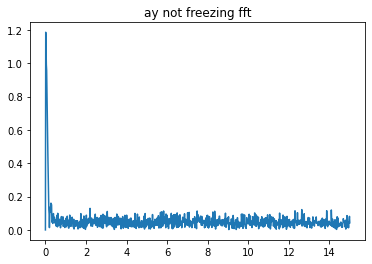

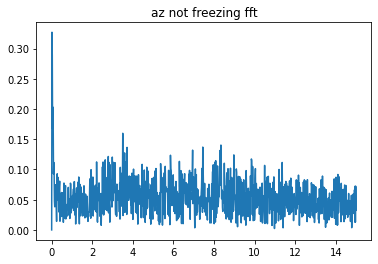

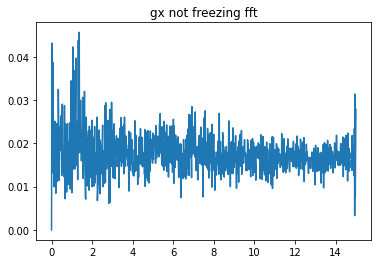

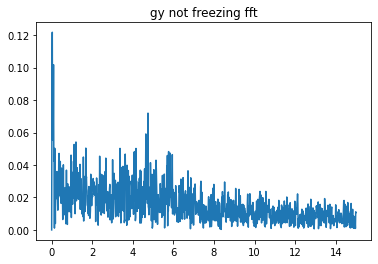

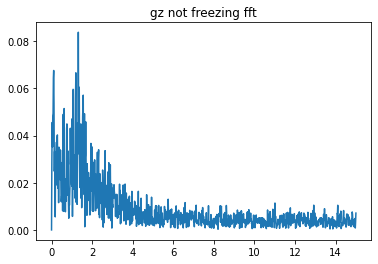

D:\LifeSpark Technology\labelled(RL2)\RSS\l2_seg.csv


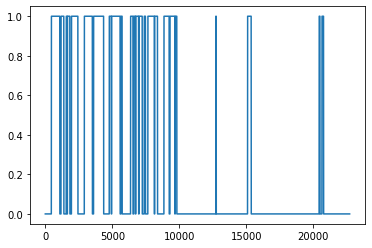

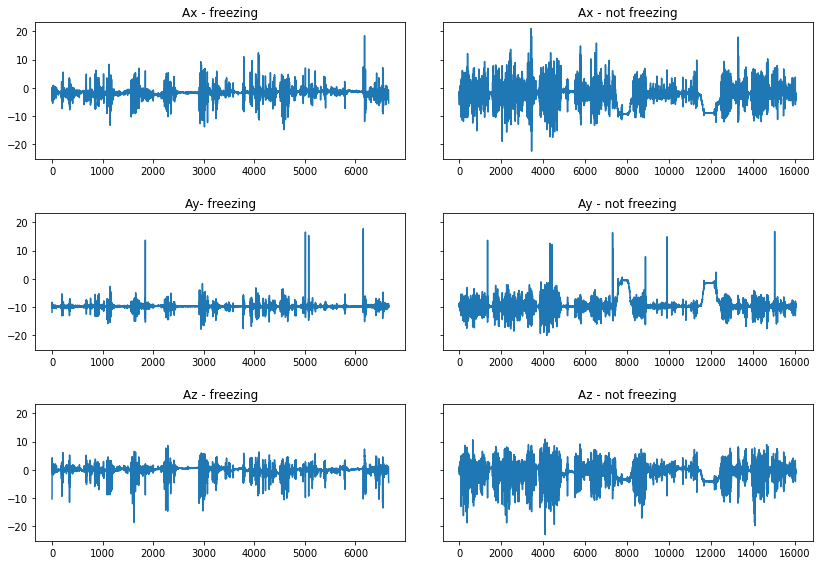

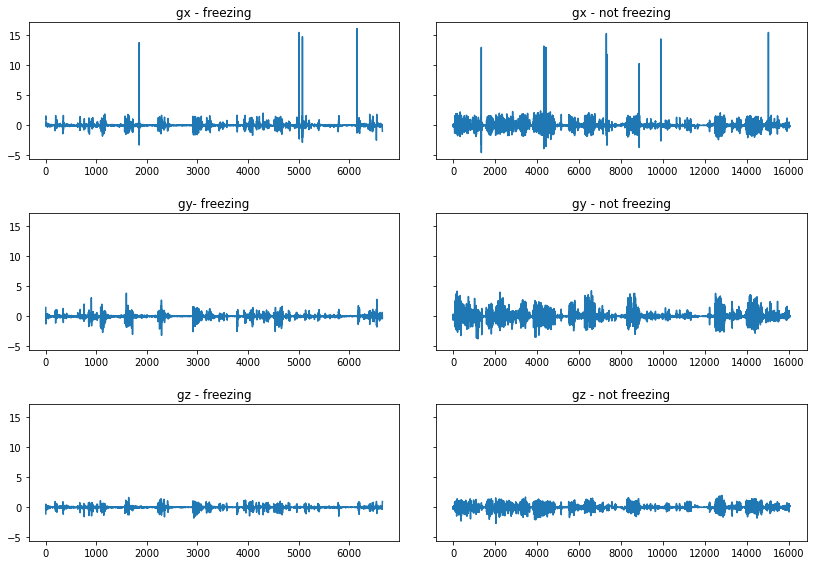

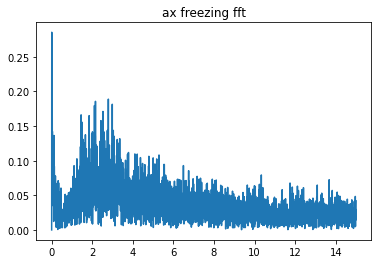

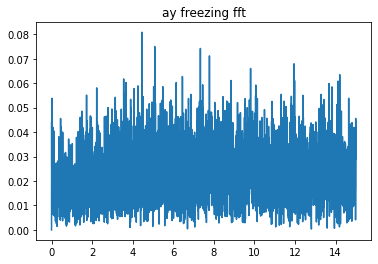

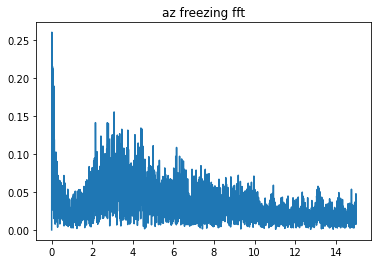

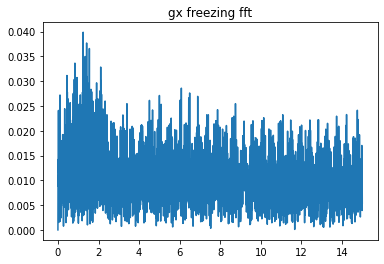

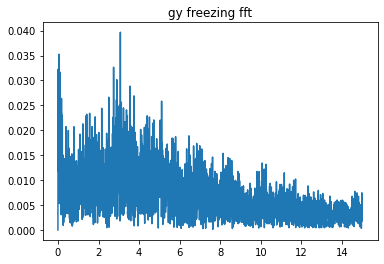

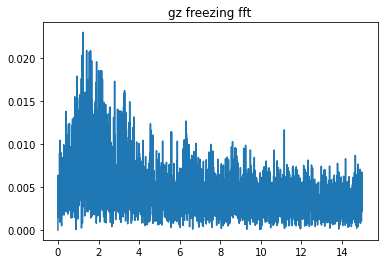

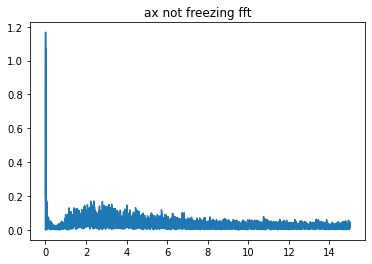

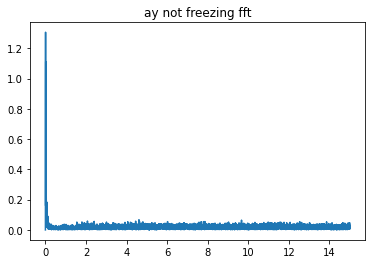

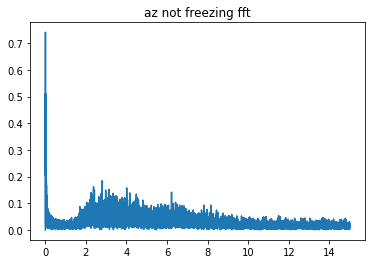

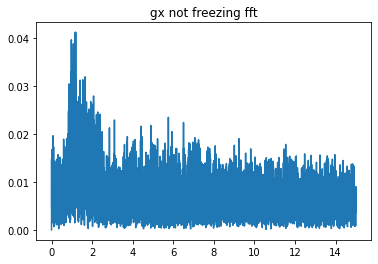

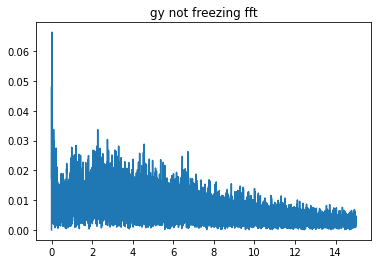

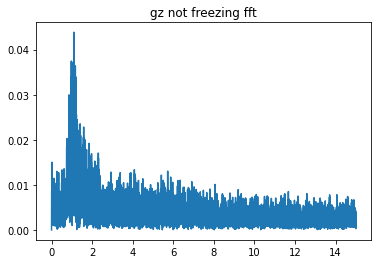

D:\LifeSpark Technology\labelled(RL2)\RSS\r2_seg.csv


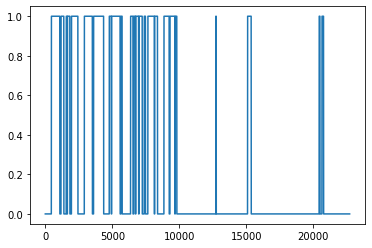

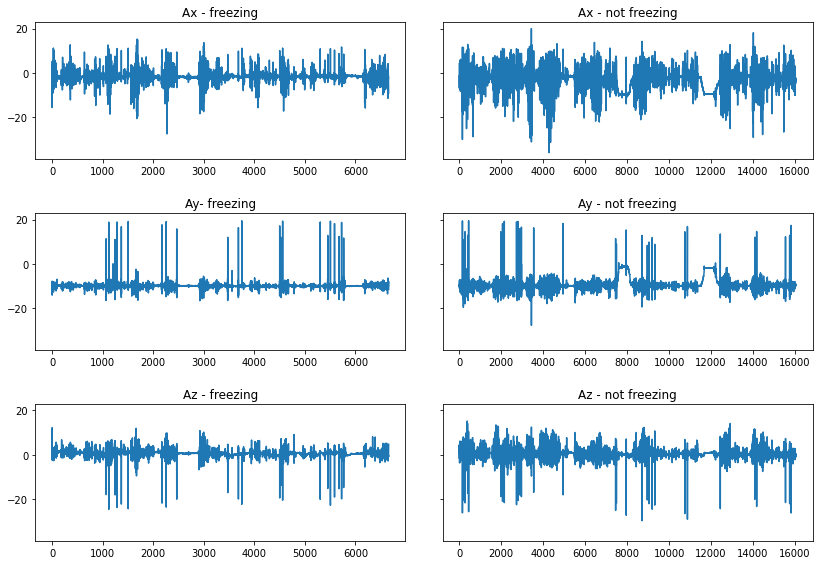

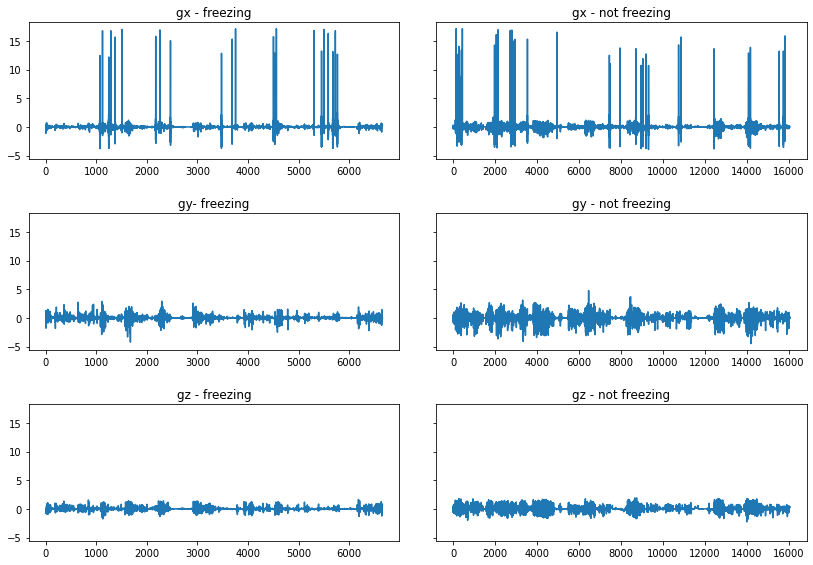

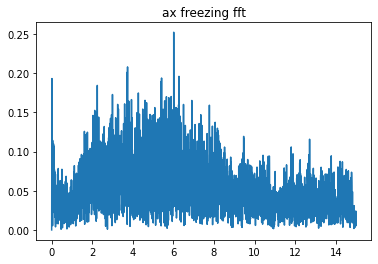

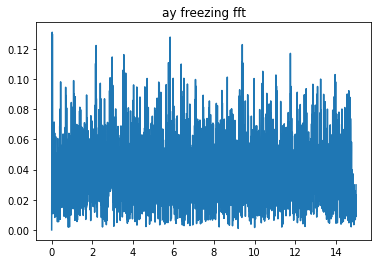

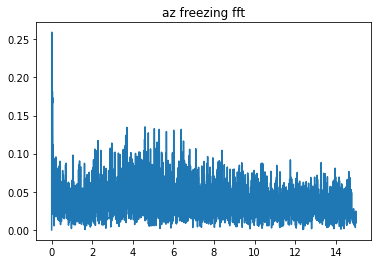

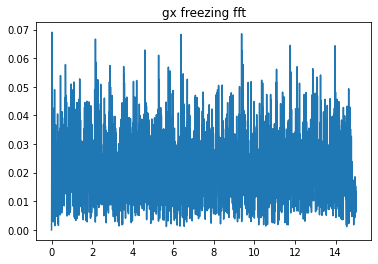

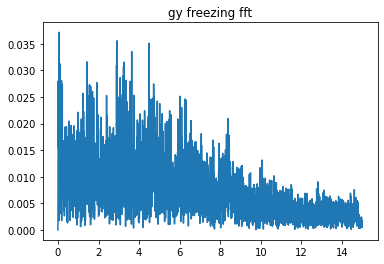

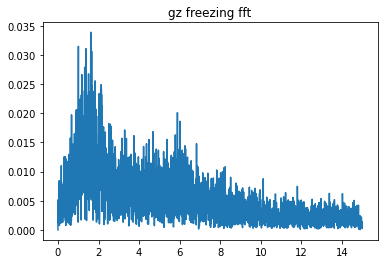

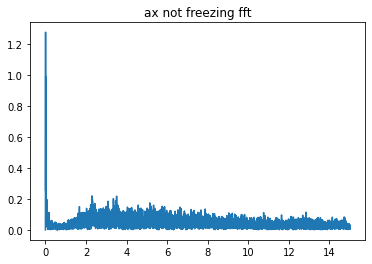

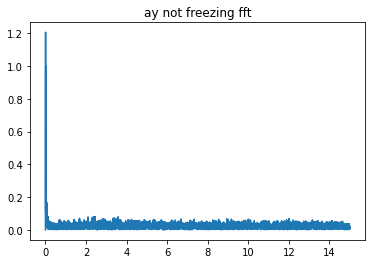

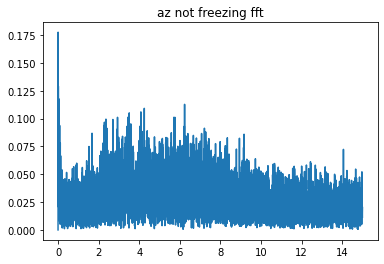

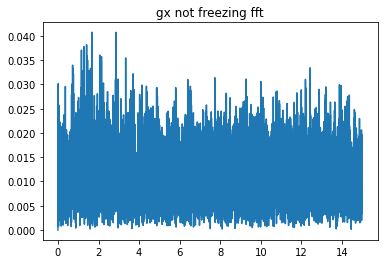

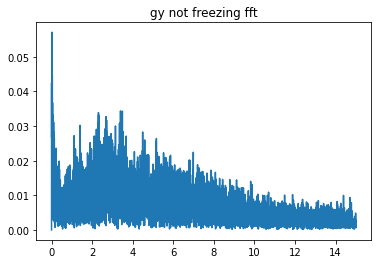

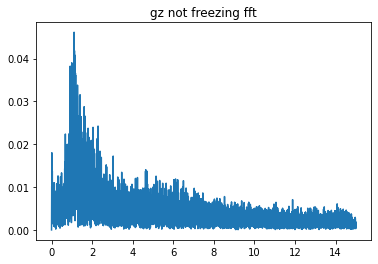

In [10]:
for file in files:
    df = pd.read_csv(file)
    if 'freezing' not in df.columns or df.empty:
        continue
    else:
        #freezing
        print(file)
        plt.figure()
        plt.plot(df['freezing'])
        plt.show()
        if (len(df[df['freezing']==1])==0):
            continue
        #ax,ay,az
        fig, ax = plt.subplots(3,2, sharey=True)
        ax[0,0].set_title('Ax - freezing')
        ax[0,0].plot(df[df['freezing']==1]['ax'].reset_index(drop = True))
        ax[1,0].set_title('Ay- freezing')
        ax[1,0].plot((df[df['freezing']==1]['ay'].reset_index(drop = True)))
        # fig.add_subplot(223)
        ax[2,0].set_title('Az - freezing')
        ax[2,0].plot((df[df['freezing']==1]['az'].reset_index(drop = True)))
        # fig.add_subplot(224)
        ax[0,1].set_title('Ax - not freezing')
        ax[0,1].plot((df[df['freezing']==0]['ax'].reset_index(drop = True)))
        # fig.add_subplot(222)
        ax[1,1].set_title('Ay - not freezing')
        ax[1,1].plot((df[df['freezing']==0]['ay'].reset_index(drop = True)))
        # fig.add_subplot(223)
        ax[2,1].set_title('Az - not freezing')
        ax[2,1].plot((df[df['freezing']==0]['az'].reset_index(drop = True)))
        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.9, 
                    top=1.9, 
                    wspace=0.1, 
                    hspace=0.4)
        plt.show()
        
        #gx,gy,gz
        fig, ax = plt.subplots(3,2, sharey=True)
        ax[0,0].set_title('gx - freezing')
        ax[0,0].plot(df[df['freezing']==1]['gx'].reset_index(drop = True))
        ax[1,0].set_title('gy- freezing')
        ax[1,0].plot((df[df['freezing']==1]['gy'].reset_index(drop = True)))
        # fig.add_subplot(223)
        ax[2,0].set_title('gz - freezing')
        ax[2,0].plot((df[df['freezing']==1]['gz'].reset_index(drop = True)))
        # fig.add_subplot(224)
        ax[0,1].set_title('gx - not freezing')
        ax[0,1].plot((df[df['freezing']==0]['gx'].reset_index(drop = True)))
        # fig.add_subplot(222)
        ax[1,1].set_title('gy - not freezing')
        ax[1,1].plot((df[df['freezing']==0]['gy'].reset_index(drop = True)))
        # fig.add_subplot(223)
        ax[2,1].set_title('gz - not freezing')
        ax[2,1].plot((df[df['freezing']==0]['gz'].reset_index(drop = True)))
        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.9, 
                    top=1.9, 
                    wspace=0.1, 
                    hspace=0.4)
        plt.show()
        
        #fft
        fs = 30
            
        d = ['ax','ay','az','gx','gy','gz']
        for k in d:
            plt.figure()
            plt.title(k + ' freezing fft')
            fft(np.array(df[df['freezing']==1][k]) , fs)
            plt.show()
        
        for k in d:
            plt.figure()
            plt.title(k + ' not freezing fft')
            fft(np.array(df[df['freezing']==0][k]) , fs)
            plt.show()